# Bussines Understanding 
Setelah menganalisis permasalahan, ditemukan bahwa terdapat perubahan dalam Fashion Campus yang sedang mengembangkan model bisnis penjualan pakaian bekas yang masih layak pakai. Dengan jumlah pengguna yang semakin meningkat, banyak pengguna yang diperoleh hanya untuk memenuhi target jumlah pengguna dari Fashion Campus. Sehingga sebagian besar di antaranya tidak organic, di mana banyak dari mereka tidak kembali ke platform untuk melakukan transaksi atau pembelian pada Fashion campus.

# Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style="whitegrid")
import plotly.express as px
# Modeling Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
# Over Sampling (SMOTE)
from imblearn.over_sampling import SMOTE
from collections import Counter
# Spliting Data
from sklearn.model_selection import train_test_split
# Model Evaluation
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score
from sklearn.metrics import classification_report, mean_absolute_error, roc_auc_score, roc_curve, auc
# Deployment
import pickle as pk

# Data Understanding

In [2]:
df_customer = pd.read_csv('E:\Skripsi\Fauzan Kamil\data-churn\customer.csv')
df_product = pd.read_csv('E:\Skripsi\Fauzan Kamil\data-churn\product.csv', on_bad_lines='skip')
df_trans = pd.read_csv('E:\Skripsi\Fauzan Kamil\data-churn\\transactions.csv')

## Dataset Customer

In [3]:
df_customer.tail()

customer_id first_name last_name                              username  \
99995        34743      Manah   Mustofa  bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c   
99996        72065       Danu   Pradana  4af2b3d5-c573-4032-b29c-24782745a2f6   
99997        32818      Talia    Aryani  af0edbfa-f354-4765-813b-b9f151022555   
99998        75597     Ajimat    Mansur  35cd82f3-6b86-42a2-bb15-933770d7f250   
99999        40573       Yani     Usada  f5a2ab29-481d-49e6-960e-cb864ee1ed5a   

                                                   email gender   birthdate  \
99995  bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...      M  2000-11-17   
99996  4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...      M  1998-03-30   
99997  af0edbfa_f354_4765_813b_b9f151022555@startupca...      F  1993-01-12   
99998  35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...      M  2000-09-13   
99999  f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...      F  1987-09-10   

      device_type                             device_id device_version  \
99995     Android  fa1914a5-0c12-4393-8d6c-af4e4a4de6aa  Android 4.3.1   
99996     Android  d8234d67-6954-4e05-8293-d37ef25bfd7e  Android 8.0.0   
99997     Android  3c586f64-aab7-4dd6-be94-5d47c6361081     Android 11   
99998     Android  3b209c58-d305-4b46-9363-b90a3914f008    Android 7.1   
99999     Android  b6bc29e0-5a22-47af-b31e-0972aafd4cab  Android 3.2.6   

       home_location_lat  home_location_long home_location home_country  \
99995          -5.203523          105.635530       Lampung    Indonesia   
99996           4.474702           95.904876          Aceh    Indonesia   
99997          -3.330376          127.028348        Maluku    Indonesia   
99998          -2.173114          101.495913         Jambi    Indonesia   
99999          -6.524369          106.283232        Banten    Indonesia   

      first_join_date  
99995      2020-10-17  
99996      2017-11-25  
99997      2018-09-01  
99998      2020-05-31  
99999      2021-07-17

In [4]:
# inspeksi dan cleaning data
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [5]:
df_customer.head()

customer_id first_name    last_name                              username  \
0         2870       Lala      Maryati  671a0865-ac4e-4dc4-9c4f-c286a1176f7e   
1         8193   Maimunah   Laksmiwati  83be2ba7-8133-48a4-bbcb-b46a2762473f   
2         7279    Bakiman  Simanjuntak  3250e5a3-1d23-4675-a647-3281879d42be   
3        88813    Cahyadi    Maheswara  df797edf-b465-4a80-973b-9fbb612260c2   
4        82542    Irnanto       Wijaya  36ab08e1-03de-42a8-9e3b-59528c798824   

                                               email gender   birthdate  \
0  671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...      F  1996-06-14   
1  83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...      F  1993-08-16   
2  3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M  1989-01-23   
3  df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...      M  1991-01-05   
4  36ab08e1_03de_42a8_9e3b_59528c798824@startupca...      M  2000-07-15   

  device_type                             device_id  \
0         iOS  c9c0de76-0a6c-4ac2-843f-65264ab9fe63   
1     Android  fb331c3d-f42e-40fe-afe2-b4b73a8a6e25   
2         iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
3         iOS  f4c18515-c5be-419f-8142-f037be47c9cd   
4         iOS  e46e4c36-4630-4736-8fcf-663db29ca3b0   

                               device_version  home_location_lat  \
0  iPhone; CPU iPhone OS 14_2_1 like Mac OS X          -1.043345   
1                               Android 2.2.1          -6.212489   
2       iPad; CPU iPad OS 4_2_1 like Mac OS X          -8.631607   
3        iPad; CPU iPad OS 14_2 like Mac OS X           1.299332   
4  iPhone; CPU iPhone OS 10_3_3 like Mac OS X          -2.980807   

   home_location_long        home_location home_country first_join_date  
0          101.360523       Sumatera Barat    Indonesia      2019-07-21  
1          106.818850         Jakarta Raya    Indonesia      2017-07-16  
2          116.428436  Nusa Tenggara Barat    Indonesia      2020-08-23  
3          115.774934     Kalimantan Timur    Indonesia      2021-10-03  
4          114.924675   Kalimantan Selatan    Indonesia      2021-04-11

In [6]:
df_customer.tail()

customer_id first_name last_name                              username  \
99995        34743      Manah   Mustofa  bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c   
99996        72065       Danu   Pradana  4af2b3d5-c573-4032-b29c-24782745a2f6   
99997        32818      Talia    Aryani  af0edbfa-f354-4765-813b-b9f151022555   
99998        75597     Ajimat    Mansur  35cd82f3-6b86-42a2-bb15-933770d7f250   
99999        40573       Yani     Usada  f5a2ab29-481d-49e6-960e-cb864ee1ed5a   

                                                   email gender   birthdate  \
99995  bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...      M  2000-11-17   
99996  4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...      M  1998-03-30   
99997  af0edbfa_f354_4765_813b_b9f151022555@startupca...      F  1993-01-12   
99998  35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...      M  2000-09-13   
99999  f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...      F  1987-09-10   

      device_type                             device_id device_version  \
99995     Android  fa1914a5-0c12-4393-8d6c-af4e4a4de6aa  Android 4.3.1   
99996     Android  d8234d67-6954-4e05-8293-d37ef25bfd7e  Android 8.0.0   
99997     Android  3c586f64-aab7-4dd6-be94-5d47c6361081     Android 11   
99998     Android  3b209c58-d305-4b46-9363-b90a3914f008    Android 7.1   
99999     Android  b6bc29e0-5a22-47af-b31e-0972aafd4cab  Android 3.2.6   

       home_location_lat  home_location_long home_location home_country  \
99995          -5.203523          105.635530       Lampung    Indonesia   
99996           4.474702           95.904876          Aceh    Indonesia   
99997          -3.330376          127.028348        Maluku    Indonesia   
99998          -2.173114          101.495913         Jambi    Indonesia   
99999          -6.524369          106.283232        Banten    Indonesia   

      first_join_date  
99995      2020-10-17  
99996      2017-11-25  
99997      2018-09-01  
99998      2020-05-31  
99999      2021-07-17

In [7]:
df_customer.shape

(100000, 15)

In [8]:
df_customer.describe()

customer_id  home_location_lat  home_location_long
count  100000.000000      100000.000000       100000.000000
mean    50000.500000          -5.106390          110.936081
std     28867.657797           3.088183            6.343363
min         1.000000         -10.845002           95.275319
25%     25000.750000          -7.372650          106.860628
50%     50000.500000          -6.240087          110.162010
75%     75000.250000          -3.092254          113.171187
max    100000.000000           5.818355          140.993119

In [9]:
df_customer.describe(include="O")

first_name last_name                              username  \
count      100000    100000                                100000   
unique        707       173                                100000   
top         Rahmi   Susanti  671a0865-ac4e-4dc4-9c4f-c286a1176f7e   
freq          560      1028                                     1   

                                                    email  gender   birthdate  \
count                                              100000  100000      100000   
unique                                             100000       2       13003   
top     671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...       F  1999-07-31   
freq                                                    1   64230          54   

       device_type                             device_id device_version  \
count       100000                                100000         100000   
unique           2                                100000             86   
top        Android  c9c0de76-0a6c-4ac2-843f-65264ab9fe63  Android 2.2.2   
freq         76637                                     1           1296   

       home_location home_country first_join_date  
count         100000       100000          100000  
unique            33            1            2223  
top     Jakarta Raya    Indonesia      2021-07-31  
freq           18715       100000             341

In [10]:
df_customer.duplicated().sum()

0

In [11]:
df_customer.isna().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

### Mengubah tipe data yang tidak sesuai

In [12]:
df_customer['birthdate'] = pd.to_datetime(df_customer['birthdate'])
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'])

In [13]:
print(df_customer.birthdate.min())
print(df_customer.birthdate.max())

1954-06-30 00:00:00
2016-07-27 00:00:00


In [14]:
df_customer.birthdate.sort_values(ascending=False).head()

18437   2016-07-27
95661   2016-02-19
93456   2016-01-29
17262   2016-01-15
35826   2015-10-13
Name: birthdate, dtype: datetime64[ns]

In [15]:
print(df_customer.first_join_date.min())
print(df_customer.first_join_date.max())

2016-06-30 00:00:00
2022-07-31 00:00:00


In [16]:
df_customer.first_join_date.sort_values(ascending=False).head()

81493   2022-07-31
53302   2022-07-31
6797    2022-07-31
16385   2022-07-31
1110    2022-07-31
Name: first_join_date, dtype: datetime64[ns]

In [17]:
print(df_customer.email.str.contains(pat="@").sum())
print(df_customer.email.str.contains(pat="@zakyfoundation").sum())
print(df_customer.email.str.contains(pat="@startupcampus").sum())

100000
35906
64094


In [18]:
#mengecek apakah ada outlier pada home_location
df_customer.home_location.unique()

array(['Sumatera Barat', 'Jakarta Raya', 'Nusa Tenggara Barat',
       'Kalimantan Timur', 'Kalimantan Selatan', 'Kepulauan Riau',
       'Bengkulu', 'Jawa Barat', 'Nusa Tenggara Timur', 'Yogyakarta',
       'Jawa Timur', 'Jawa Tengah', 'Sulawesi Tenggara', 'Lampung',
       'Bangka Belitung', 'Maluku', 'Sulawesi Utara', 'Sulawesi Barat',
       'Jambi', 'Kalimantan Tengah', 'Sumatera Utara', 'Kalimantan Barat',
       'Papua Barat', 'Sulawesi Selatan', 'Maluku Utara', 'Banten',
       'Bali', 'Riau', 'Sumatera Selatan', 'Aceh', 'Papua',
       'Sulawesi Tengah', 'Gorontalo'], dtype=object)

In [19]:
#mengecek apakah ada outlier pada device_type
df_customer.device_version.unique()

array(['iPhone; CPU iPhone OS 14_2_1 like Mac OS X', 'Android 2.2.1',
       'iPad; CPU iPad OS 4_2_1 like Mac OS X',
       'iPad; CPU iPad OS 14_2 like Mac OS X',
       'iPhone; CPU iPhone OS 10_3_3 like Mac OS X', 'Android 4.0.4',
       'Android 8.1.0', 'Android 4.2',
       'iPad; CPU iPad OS 10_3_3 like Mac OS X', 'Android 4.0.1',
       'Android 2.2.2', 'Android 2.3', 'Android 7.1.1', 'Android 2.3.3',
       'iPhone; CPU iPhone OS 6_1_6 like Mac OS X', 'Android 4.1.2',
       'Android 3.2.6', 'Android 11', 'Android 3.2.4', 'Android 6.0.1',
       'Android 5.1', 'Android 2.0.1', 'Android 7.1', 'Android 8.0.0',
       'iPad; CPU iPad OS 6_1_6 like Mac OS X', 'Android 3.2',
       'Android 3.2.5', 'Android 5.0.1', 'Android 3.2.3',
       'iPhone; CPU iPhone OS 9_3_6 like Mac OS X', 'Android 2.3.1',
       'Android 2.0', 'iPad; CPU iPad OS 5_1_1 like Mac OS X',
       'Android 2.3.6', 'Android 5.0.2', 'Android 3.1', 'Android 7.1.2',
       'Android 2.3.5', 'Android 4.2.2',
       '

## Kesiapan Data Customer
* Most columns have the data type object. It appears that every column **NOT contains** empty value since the Non-Null count for every column is equal with the total number of rows (100000) **nor** the data contains duplicated data.
* Dataset ini memiliki 20 kolom dan 100000 baris.
* Periode pengambilan data 2016-06-30 hingga 2022-07-31
* Customer tertua lahir pada tahun 1954 dan yang termuda lahir pada tahun 2016.
* Terdapat 4 customer yang lahir pada tahun 2016, 9 customer yang lahir pada tahun 2015.
* Sebanyak 64230 customer berjenis kelamin perempuan
* Hanya terdapat 2 tipe device, yaitu android dan IoS dengan variasi sebanyak 86 versi device. Dan sebanyak 76637 customer menggunakan Android
* Data yang tersedia dari Indonesia dengan sebaran sebanyak 33 provinsi.
* It seems that there is no outlier in this dataset, **Ready for some EDA?**

## Dataset Product

In [20]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [21]:
df_product.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt

In [22]:
df_product.tail()

id gender masterCategory subCategory            articleType  \
44419  17036    Men       Footwear       Shoes           Casual Shoes   
44420   6461    Men       Footwear  Flip Flops             Flip Flops   
44421  18842    Men        Apparel     Topwear                Tshirts   
44422  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44423  51623  Women    Accessories     Watches                Watches   

      baseColour  season    year   usage  \
44419      White  Summer  2013.0  Casual   
44420        Red  Summer  2011.0  Casual   
44421       Blue    Fall  2011.0  Casual   
44422       Blue  Spring  2017.0  Casual   
44423       Pink  Winter  2016.0  Casual   

                                    productDisplayName  
44419                        Gas Men Caddy Casual Shoe  
44420               Lotto Men's Soccer Track Flip Flop  
44421             Puma Men Graphic Stellar Blue Tshirt  
44422                   Rasasi Women Blue Lady Perfume  
44423  Fossil Women Pink Dial Chronograph Watch ES3050

In [23]:
df_product.shape

(44424, 10)

In [24]:
df_product.describe()

id          year
count  44424.000000  44423.000000
mean   29696.334301   2012.806497
std    17049.490518      2.126480
min     1163.000000   2007.000000
25%    14768.750000   2011.000000
50%    28618.500000   2012.000000
75%    44683.250000   2015.000000
max    60000.000000   2019.000000

In [25]:
df_product.describe(include="O")

gender masterCategory subCategory articleType baseColour  season  \
count   44424          44424       44424       44424      44409   44403   
unique      5              7          45         143         46       4   
top       Men        Apparel     Topwear     Tshirts      Black  Summer   
freq    22147          21397       15402        7067       9728   21472   

         usage            productDisplayName  
count    44107                         44417  
unique       8                         31121  
top     Casual  Lucera Women Silver Earrings  
freq     34406                            82

In [26]:
df_product.duplicated().sum()

0

In [27]:
df_product.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

### Mengubah nama kolom gender product, agar berbeda dengan gender customer


In [28]:
df_product.rename(columns={'gender': 'gender_product'}, inplace=True)

### Data Cleaning Product
Dapat dilihat dari statistik deskriptif di atas bahwa dataset ini, terdapat tipe data yang tidak sesuai dan memelurkan data cleaning

### Mengubah tipe data kolom year

In [29]:
df_product["year"] = pd.to_numeric(df_product["year"], errors='coerce')

In [30]:
fixed_product = df_product.copy()
# Isi missing value dengan nilai modus
fixed_product["year"] = fixed_product["year"].fillna(fixed_product["year"].mode()[0])
fixed_product["baseColour"] = fixed_product["baseColour"].fillna(fixed_product["baseColour"].mode()[0])
fixed_product["season"] = fixed_product["season"].fillna(fixed_product["season"].mode()[0])
fixed_product["usage"] = fixed_product["usage"].fillna(fixed_product["usage"].mode()[0])
fixed_product["productDisplayName"] = fixed_product["productDisplayName"].fillna(
    fixed_product["productDisplayName"].mode()[0])

In [31]:
fixed_product.isna().sum()

id                    0
gender_product        0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

In [32]:
fixed_product.usage.unique()

array(['Casual', 'Ethnic', 'Formal', 'Sports', 'Smart Casual', 'Travel',
       'Party', 'Home'], dtype=object)

## Dataset Transaction

In [33]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856584 entries, 0 to 856583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              856584 non-null  object 
 1   customer_id             856584 non-null  int64  
 2   booking_id              856584 non-null  object 
 3   session_id              856584 non-null  object 
 4   product_metadata        856584 non-null  object 
 5   payment_method          856584 non-null  object 
 6   payment_status          856584 non-null  object 
 7   promo_amount            856584 non-null  int64  
 8   promo_code              330536 non-null  object 
 9   shipment_fee            856584 non-null  int64  
 10  shipment_date_limit     856584 non-null  object 
 11  shipment_location_lat   856584 non-null  float64
 12  shipment_location_long  856584 non-null  float64
 13  total_amount            856584 non-null  int64  
dtypes: float64(2), int64

In [34]:
df_trans.describe()

customer_id   promo_amount   shipment_fee  shipment_location_lat  \
count  856584.000000  856584.000000  856584.000000          856584.000000   
mean    49839.885754    2032.773459    9230.542480              -5.099648   
std     28998.260883    3059.338195    9444.007665               3.097947   
min         3.000000       0.000000       0.000000             -10.995516   
25%     24563.000000       0.000000       0.000000              -7.376988   
50%     49619.000000       0.000000   10000.000000              -6.239909   
75%     74964.000000    3977.000000   10000.000000              -3.072615   
max     99999.000000   24519.000000   50000.000000               5.991059   

       shipment_location_long  total_amount  
count           856584.000000  8.565840e+05  
mean               110.995748  5.592967e+05  
std                  6.465945  8.374165e+05  
min                 94.024244  3.263000e+03  
25%                106.863744  2.041340e+05  
50%                110.173371  3.038695e+05  
75%                113.232421  5.197782e+05  
max                141.006140  2.350449e+07

In [35]:
df_trans.head()

created_at  customer_id  \
0  2018-08-25T18:54:03.844494Z            3   
1  2018-09-22T18:42:52.844494Z            3   
2  2018-10-20T19:07:54.844494Z            3   
3  2018-11-17T19:09:49.844494Z            3   
4  2018-12-15T19:33:50.844494Z            3   

                             booking_id                            session_id  \
0  856b0c3d-b076-406b-be11-3dfee762e9be  f03b6825-1e6e-4916-bf71-f94ecbcbaee5   
1  f9b17de8-5db3-40dc-9227-664c6679543c  36673b2f-940a-42b5-994d-1cce4796b55f   
2  caa8be57-6239-4b5b-ae0b-e27887a13356  93e1d3c4-bed1-4ef4-b79f-e24a79e905b7   
3  688cef52-8ee7-44ea-98af-20daf0c5609b  8356370c-267e-4530-a2d3-1830e4be3f2b   
4  a12fb778-d19a-4559-9808-8115f01c1595  ef7f4829-e7d1-4513-861b-1fbbc6e41bbf   

                                    product_metadata payment_method  \
0  [{'product_id': 56019, 'quantity': 5, 'item_pr...    Credit Card   
1  [{'product_id': 30235, 'quantity': 1, 'item_pr...    Credit Card   
2  [{'product_id': 7808, 'quantity': 1, 'item_pri...    Credit Card   
3  [{'product_id': 48968, 'quantity': 1, 'item_pr...    Credit Card   
4  [{'product_id': 59272, 'quantity': 1, 'item_pr...    Credit Card   

  payment_status  promo_amount     promo_code  shipment_fee  \
0        Success          8073  WEEKENDMANTAP             0   
1        Success             0            NaN         10000   
2        Success          8828    WEEKENDSERU         10000   
3        Success          3415    WEEKENDSERU             0   
4        Success          2645      LIBURDONG         10000   

           shipment_date_limit  shipment_location_lat  shipment_location_long  \
0  2018-08-27T05:08:15.817545Z              -6.151858              106.945839   
1  2018-09-25T19:14:55.732974Z              -8.710879              122.178317   
2  2018-10-26T05:26:58.264371Z              -8.391546              115.345669   
3  2018-11-21T05:06:08.279671Z              -6.151858              106.945839   
4  2018-12-18T21:15:53.089926Z              -0.988670              109.794413   

   total_amount  
0        826597  
1        163784  
2        124932  
3        247902  
4        181237

In [36]:
df_trans.tail()

created_at  customer_id  \
856579  2022-11-04T00:17:53.730530Z        56960   
856580  2022-11-09T22:32:57.164320Z         4039   
856581  2022-09-11T12:38:40.144030Z        58175   
856582  2022-10-11T23:06:17.199864Z        17099   
856583  2022-09-06T19:35:14.468731Z        42970   

                              booking_id                        session_id  \
856579  72c28294cc4a2f49fd90b00c8c98ad0e  b0195881ed537386a7a4518cd445888a   
856580  5b35d94aeedfab0e6ce037482fc03243  563cbc88c19db2b287cd3717eebb5aef   
856581  52a000f5704d767f0792146167140e18  027058c8b469c0be8639c4c7c8adeb93   
856582  578991f4f6dc45423b5c0a8a5145e701  94b7153860436d7c2cb9deea19752740   
856583  f43dfdf4f532180bbcf7b27e39f83c19  c4165bd76203c31d0171bc7f192f21e4   

                                         product_metadata payment_method  \
856579  [{'product_id': 66962, 'quantity': 5, 'item_pr...    Credit Card   
856580  [{'product_id': 12175, 'quantity': 2, 'item_pr...     Debit Card   
856581  [{'product_id': 42701, 'quantity': 1, 'item_pr...     Debit Card   
856582  [{'product_id': 496, 'quantity': 4, 'item_pric...     Debit Card   
856583  [{'product_id': 55555, 'quantity': 9, 'item_pr...    Credit Card   

       payment_status  promo_amount     promo_code  shipment_fee  \
856579         Failed            17         SC2022         10000   
856580         Failed            62        STARTUP         50000   
856581         Failed            70              0          5000   
856582       Succsess            47        BUYMORE             0   
856583       Succsess            13  WEEKENDMANTAP          5000   

                shipment_date_limit  shipment_location_lat  \
856579  2022-11-06T00:17:53.730530Z               3.870668   
856580  2022-11-11T22:32:57.164320Z              -5.756153   
856581  2022-09-13T12:38:40.144030Z              -6.236361   
856582  2022-10-13T23:06:17.199864Z               1.302849   
856583  2022-09-08T19:35:14.468731Z              -6.557069   

        shipment_location_long  total_amount  
856579              130.344404        672215  
856580               96.416391        439242  
856581               97.259094        139202  
856582              130.214041       1047344  
856583              131.695673       4507403

In [37]:
df_trans.shape

(856584, 14)

### Atribut shipment_date_limit dan created_id pada dataset transaksi

In [38]:
df_trans['shipment_date_limit'] = pd.to_datetime(df_trans['shipment_date_limit'])
df_trans['created_at'] = pd.to_datetime(df_trans['created_at'])

In [39]:
# Ubah Tipe Data shipment_date_limit
#df_trans['shipment_date_limit'] = pd.to_datetime(df_trans['shipment_date_limit'])
#df_trans['shipment_date_limit'].dtypes

In [40]:
# Ubah tipe data created_id
#df_trans['created_at'] = pd.to_datetime(df_trans['created_at'])
#df_trans['created_at'].dtypes

In [41]:
# Cek Tipe Data
df_trans.dtypes

created_at                datetime64[ns, UTC]
customer_id                             int64
booking_id                             object
session_id                             object
product_metadata                       object
payment_method                         object
payment_status                         object
promo_amount                            int64
promo_code                             object
shipment_fee                            int64
shipment_date_limit       datetime64[ns, UTC]
shipment_location_lat                 float64
shipment_location_long                float64
total_amount                            int64
dtype: object

In [42]:
# Cek Data Duplikat
df_trans.duplicated().sum()

0

In [43]:
# Cek Data Unik
df_trans.nunique()

created_at                856584
customer_id                52625
booking_id                856584
session_id                856584
product_metadata          856566
payment_method                 5
payment_status                 3
promo_amount               15279
promo_code                     9
shipment_fee                   6
shipment_date_limit       856584
shipment_location_lat     444938
shipment_location_long    444268
total_amount              473210
dtype: int64

In [44]:
df_trans.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
dtype: int64

### Handling Missing Value

In [45]:
df_trans['promo_code'].fillna('NOPROMO', inplace=True)

### Membuat Kolom id dengan product_id isi dari kolom product metadata

In [46]:
df_trans['product_metadata'].replace("[^\w\s]", ' ', regex=True, inplace=True)
df_trans['id'] = df_trans.product_metadata.str[15:21]
df_trans['id'] = pd.to_numeric(df_trans['id'], errors='coerce')

### Membuat Kolom qty dengan quantity dari kolom product metadata

In [47]:
df_trans['qty'] = df_trans.product_metadata.str[34:36]
df_trans['qty'] = pd.to_numeric(df_trans['qty'], errors='coerce')
#df_trans['qty'].value_counts()

### Membuat Kolom price dengan item_price dari kolom product metadata

In [48]:
df_trans['price'] = df_trans.product_metadata.str[51:58]
df_trans['price'] = pd.to_numeric(df_trans['price'], errors='coerce')
#df_trans['price'].value_counts()

# Data Preparation

In [49]:
%%time
# Merge dataset
df_1 = pd.merge(df_trans, df_customer, on='customer_id', how='left')
df_1 = pd.merge(df_1, fixed_product, on='id', how='left')

CPU times: total: 3.28 s
Wall time: 8.21 s


In [50]:
df_1.tail()

created_at  customer_id  \
856579 2022-11-04 00:17:53.730530+00:00        56960   
856580 2022-11-09 22:32:57.164320+00:00         4039   
856581 2022-09-11 12:38:40.144030+00:00        58175   
856582 2022-10-11 23:06:17.199864+00:00        17099   
856583 2022-09-06 19:35:14.468731+00:00        42970   

                              booking_id                        session_id  \
856579  72c28294cc4a2f49fd90b00c8c98ad0e  b0195881ed537386a7a4518cd445888a   
856580  5b35d94aeedfab0e6ce037482fc03243  563cbc88c19db2b287cd3717eebb5aef   
856581  52a000f5704d767f0792146167140e18  027058c8b469c0be8639c4c7c8adeb93   
856582  578991f4f6dc45423b5c0a8a5145e701  94b7153860436d7c2cb9deea19752740   
856583  f43dfdf4f532180bbcf7b27e39f83c19  c4165bd76203c31d0171bc7f192f21e4   

                                         product_metadata payment_method  \
856579     product_id   66962   quantity   5   item_pr...    Credit Card   
856580     product_id   12175   quantity   2   item_pr...     Debit Card   
856581     product_id   42701   quantity   1   item_pr...     Debit Card   
856582     product_id   496   quantity   4   item_pric...     Debit Card   
856583     product_id   55555   quantity   9   item_pr...    Credit Card   

       payment_status  promo_amount     promo_code  shipment_fee  ...  \
856579         Failed            17         SC2022         10000  ...   
856580         Failed            62        STARTUP         50000  ...   
856581         Failed            70              0          5000  ...   
856582       Succsess            47        BUYMORE             0  ...   
856583       Succsess            13  WEEKENDMANTAP          5000  ...   

       first_join_date  gender_product  masterCategory  subCategory  \
856579      2020-02-23             NaN             NaN          NaN   
856580      2020-10-10             Men         Apparel      Topwear   
856581      2021-11-06           Women        Footwear        Shoes   
856582      2019-08-15             NaN             NaN          NaN   
856583      2021-05-23             NaN             NaN          NaN   

        articleType  baseColour  season    year   usage  \
856579          NaN         NaN     NaN     NaN     NaN   
856580       Shirts        Blue    Fall  2011.0  Casual   
856581        Flats      Silver  Winter  2012.0  Casual   
856582          NaN         NaN     NaN     NaN     NaN   
856583          NaN         NaN     NaN     NaN     NaN   

                            productDisplayName  
856579                                     NaN  
856580  Basics Men Blue Slim Fit Checked Shirt  
856581              Rocia Women Silver Sandals  
856582                                     NaN  
856583                                     NaN  

[5 rows x 40 columns]

In [51]:
df_1.shape 

(856584, 40)

In [52]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856584 entries, 0 to 856583
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   created_at              856584 non-null  datetime64[ns, UTC]
 1   customer_id             856584 non-null  int64              
 2   booking_id              856584 non-null  object             
 3   session_id              856584 non-null  object             
 4   product_metadata        856584 non-null  object             
 5   payment_method          856584 non-null  object             
 6   payment_status          856584 non-null  object             
 7   promo_amount            856584 non-null  int64              
 8   promo_code              856584 non-null  object             
 9   shipment_fee            856584 non-null  int64              
 10  shipment_date_limit     856584 non-null  datetime64[ns, UTC]
 11  shipment_location_lat   85

In [53]:
df_1['gender'].value_counts()

F    546077
M    310507
Name: gender, dtype: int64

In [54]:
df_1.created_at.max()

Timestamp('2022-12-26 14:18:35.425944+0000', tz='UTC')

In [55]:
df_1.isnull().sum()

created_at                   0
customer_id                  0
booking_id                   0
session_id                   0
product_metadata             0
payment_method               0
payment_status               0
promo_amount                 0
promo_code                   0
shipment_fee                 0
shipment_date_limit          0
shipment_location_lat        0
shipment_location_long       0
total_amount                 0
id                           0
qty                         40
price                        0
first_name                   0
last_name                    0
username                     0
email                        0
gender                       0
birthdate                    0
device_type                  0
device_id                    0
device_version               0
home_location_lat            0
home_location_long           0
home_location                0
home_country                 0
first_join_date              0
gender_product            2697
masterCa

In [56]:
# Cek duplikasi data
df_1.duplicated().sum()

0

## Recency

In [57]:
recency = df_1.groupby('customer_id')['created_at'].max().reset_index()
recency['recent_days'] = (recency['created_at'].max() - recency['created_at']).dt.days
recency[['customer_id','recent_days']]

customer_id  recent_days
0                3           97
1                7           98
2                8          224
3                9          212
4               11          293
...            ...          ...
52620        99992          215
52621        99995          150
52622        99997          974
52623        99998          335
52624        99999         2265

[52625 rows x 2 columns]

## Frequency

In [58]:
frequency = pd.DataFrame(df_1.groupby('customer_id')['booking_id'].count())
frequency.columns = ['frequency']
frequency

frequency
customer_id           
3                   52
7                    1
8                    7
9                    6
11                   1
...                ...
99992               12
99995               60
99997                1
99998                8
99999                1

[52625 rows x 1 columns]

## Monetary

In [59]:
monetary = pd.DataFrame(df_1.groupby('customer_id')['total_amount'].sum())
monetary.columns = ['monetary']

In [60]:
monetary

monetary
customer_id          
3            23122776
7              966126
8             3898561
9             2638665
11             197533
...               ...
99992         4352229
99995        36043743
99997          226461
99998         6692540
99999          196111

[52625 rows x 1 columns]

In [61]:
df_rfm = pd.merge(recency, frequency, on='customer_id')
df_rfm = pd.merge(df_rfm, monetary, on='customer_id')
df_rfm.head()

customer_id                       created_at  recent_days  frequency  \
0            3 2022-09-19 16:09:41.080082+00:00           97         52   
1            7 2022-09-19 02:14:03.589096+00:00           98          1   
2            8 2022-05-15 22:46:22.656991+00:00          224          7   
3            9 2022-05-28 08:44:32.421034+00:00          212          6   
4           11 2022-03-07 14:29:13.759159+00:00          293          1   

   monetary  
0  23122776  
1    966126  
2   3898561  
3   2638665  
4    197533

In [62]:
df_rfm.describe()

customer_id   recent_days     frequency      monetary
count  52625.000000  52625.000000  52625.000000  5.262500e+04
mean   49827.060542    419.499135     16.277131  9.103746e+06
std    28959.445502    431.681203     29.316113  1.642322e+07
min        3.000000      0.000000      1.000000  3.263000e+03
25%    24705.000000    176.000000      2.000000  8.284340e+05
50%    49725.000000    240.000000      5.000000  3.154836e+06
75%    74917.000000    473.000000     17.000000  9.799040e+06
max    99999.000000   2368.000000    550.000000  3.200618e+08

In [63]:
# Cek duplikasi data
df_rfm.duplicated().sum()

0

In [64]:
# Cek missing value
df_rfm.isnull().sum()

customer_id    0
created_at     0
recent_days    0
frequency      0
monetary       0
dtype: int64

## RFM Analysis
referensi: https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

In [65]:
df_rfm['R_rank'] = df_rfm['recent_days'].rank(ascending=False)
df_rfm['F_rank'] = df_rfm['frequency'].rank(ascending=True)
df_rfm['M_rank'] = df_rfm['monetary'].rank(ascending=True)

# normalizing the rank of the customers
df_rfm['R_rank_norm'] = (df_rfm['R_rank']/df_rfm['R_rank'].max())*100
df_rfm['F_rank_norm'] = (df_rfm['F_rank']/df_rfm['F_rank'].max())*100
df_rfm['M_rank_norm'] = (df_rfm['F_rank']/df_rfm['M_rank'].max())*100

df_rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

df_rfm['RFM_Score'] = 0.15*df_rfm['R_rank_norm']+0.28 * df_rfm['F_rank_norm']+0.57*df_rfm['M_rank_norm']
df_rfm['RFM_Score'] *= 0.05
df_rfm = df_rfm.round(2)
df_rfm.head()

customer_id                       created_at  recent_days  frequency  \
0            3 2022-09-19 16:09:41.080082+00:00           97         52   
1            7 2022-09-19 02:14:03.589096+00:00           98          1   
2            8 2022-05-15 22:46:22.656991+00:00          224          7   
3            9 2022-05-28 08:44:32.421034+00:00          212          6   
4           11 2022-03-07 14:29:13.759159+00:00          293          1   

   monetary  R_rank_norm  F_rank_norm  M_rank_norm  RFM_Score  
0  23122776        95.07        92.24        92.24       4.63  
1    966126        95.02        11.15        11.15       1.19  
2   3898561        54.08        55.59        55.59       2.77  
3   2638665        57.64        52.11        52.11       2.65  
4    197533        40.53        11.15        11.15       0.78

In [66]:
df_rfm["Customer_segment"] = np.where(df_rfm['RFM_Score'] >
                                    4.5, "Best Customers",
                                    (np.where(df_rfm['RFM_Score'] > 4,
                                        "Loyal Customers",
                                        (np.where(df_rfm['RFM_Score'] > 3,
                            "Promising Customers",
                            np.where(df_rfm['RFM_Score'] > 1.6,
                            'At-Risk Customers', 'Lost Customers'))))))
df_rfm.sort_values("customer_id", ascending=True)

customer_id                       created_at  recent_days  frequency  \
0                3 2022-09-19 16:09:41.080082+00:00           97         52   
1                7 2022-09-19 02:14:03.589096+00:00           98          1   
2                8 2022-05-15 22:46:22.656991+00:00          224          7   
3                9 2022-05-28 08:44:32.421034+00:00          212          6   
4               11 2022-03-07 14:29:13.759159+00:00          293          1   
...            ...                              ...          ...        ...   
52620        99992 2022-05-25 09:32:49.873510+00:00          215         12   
52621        99995 2022-07-29 03:54:17.810263+00:00          150         60   
52622        99997 2020-04-25 18:38:16.825127+00:00          974          1   
52623        99998 2022-01-25 00:54:09.703960+00:00          335          8   
52624        99999 2016-10-12 19:22:21.166237+00:00         2265          1   

       monetary  R_rank_norm  F_rank_norm  M_rank_norm  RFM_Score  \
0      23122776        95.07        92.24        92.24       4.63   
1        966126        95.02        11.15        11.15       1.19   
2       3898561        54.08        55.59        55.59       2.77   
3       2638665        57.64        52.11        52.11       2.65   
4        197533        40.53        11.15        11.15       0.78   
...         ...          ...          ...          ...        ...   
52620   4352229        56.74        67.35        67.35       3.29   
52621  36043743        90.37        93.68        93.68       4.66   
52622    226461        10.11        11.15        11.15       0.55   
52623   6692540        35.13        58.60        58.60       2.75   
52624    196111         0.42        11.15        11.15       0.48   

          Customer_segment  
0           Best Customers  
1           Lost Customers  
2        At-Risk Customers  
3        At-Risk Customers  
4           Lost Customers  
...                    ...  
52620  Promising Customers  
52621       Best Customers  
52622       Lost Customers  
52623    At-Risk Customers  
52624       Lost Customers  

[52625 rows x 10 columns]

In [67]:
# Cek duplikasi data
df_rfm.duplicated().sum()

0

### K-Means Clustering RFM

In [68]:
# K Means Clustering
from sklearn.cluster import KMeans
X_cluster = df_rfm[['R_rank_norm', 'F_rank_norm', 'M_rank_norm']]
X_cluster = X_cluster.values.reshape(-1,3)

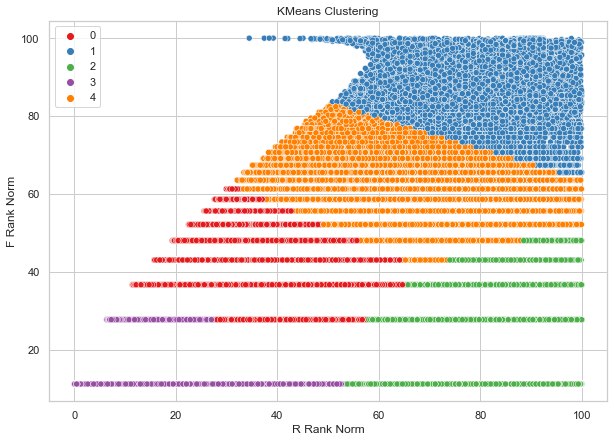

In [69]:
# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_cluster)
kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(X_cluster[:,0], X_cluster[:,1], hue=kmeans.labels_, palette='Set1')
plt.title('KMeans Clustering')
plt.xlabel('R Rank Norm')
plt.ylabel('F Rank Norm')
plt.show()

## Feature Engineering

In [70]:
# membuat features tahun dilakukannya pembelian
df_1["purchase_year"] = df_1.created_at.dt.year

#membuat feature shipment fee customer
ongkir = df_1.groupby("customer_id")[["shipment_fee"]].sum()
ongkir = ongkir.reset_index()
ongkir.columns = ["customer_id","ongkir"]

# membuat feature jumlah promo yang telah customer gunakan
total_promo = df_1.groupby("customer_id")[["promo_amount"]].sum()
total_promo = total_promo.reset_index()
total_promo.columns = ["customer_id","total_promo"]

In [71]:
initial_purchase_date = df_1.groupby('customer_id')['created_at'].min().reset_index()
initial_purchase_date = initial_purchase_date.rename(columns={'created_at': 'initial_purchase_date'})

In [72]:
last_purchase_date = df_1.groupby('customer_id')['created_at'].max().reset_index()
last_purchase_date = last_purchase_date.rename(columns={'created_at': 'last_purchase_date'})

In [73]:
new_df = pd.merge(initial_purchase_date, last_purchase_date, on='customer_id')
df_rfm = pd.merge(new_df, df_rfm, on='customer_id')

In [74]:
df_rfm["tenure"] = (df_rfm.last_purchase_date - df_rfm.initial_purchase_date).dt.days/30
df_rfm["tenure"]

0        49.500000
1         0.000000
2        15.200000
3        11.166667
4         0.000000
           ...    
52620    23.100000
52621    23.600000
52622     0.000000
52623    43.400000
52624     0.000000
Name: tenure, Length: 52625, dtype: float64

In [75]:
df_rfm["monthly_spend"] = np.round(df_rfm.monetary / df_rfm.tenure, 2)

In [76]:
df_rfm["monthly_spend"].replace([np.inf, -np.inf], np.nan, inplace=True)
df_rfm["monthly_spend"].fillna(df_rfm.monetary, inplace=True)
df_rfm["monthly_spend"]

0         467126.79
1         966126.00
2         256484.28
3         236298.36
4         197533.00
            ...    
52620     188408.18
52621    1527277.25
52622     226461.00
52623     154205.99
52624     196111.00
Name: monthly_spend, Length: 52625, dtype: float64

In [77]:
df_rfm.describe()

customer_id   recent_days     frequency      monetary   R_rank_norm  \
count  52625.000000  52625.000000  52625.000000  5.262500e+04  52625.000000   
mean   49827.060542    419.499135     16.277131  9.103746e+06     50.014010   
std    28959.445502    431.681203     29.316113  1.642322e+07     28.874982   
min        3.000000      0.000000      1.000000  3.263000e+03      0.000000   
25%    24705.000000    176.000000      2.000000  8.284340e+05     25.010000   
50%    49725.000000    240.000000      5.000000  3.154836e+06     50.010000   
75%    74917.000000    473.000000     17.000000  9.799040e+06     75.120000   
max    99999.000000   2368.000000    550.000000  3.200618e+08    100.000000   

        F_rank_norm   M_rank_norm     RFM_Score        tenure  monthly_spend  
count  52625.000000  52625.000000  52625.000000  52625.000000   5.262500e+04  
mean      50.000734     50.000734      2.500171     22.310272   7.121800e+05  
std       28.677184     28.677184      1.358466     20.650762   2.033848e+06  
min       11.150000     11.150000      0.470000      0.000000   3.263000e+03  
25%       27.670000     27.670000      1.280000      1.733333   1.192539e+05  
50%       48.000000     48.000000      2.480000     17.966667   2.759008e+05  
75%       74.510000     74.510000      3.690000     37.400000   6.486200e+05  
max      100.000000    100.000000      4.980000     78.766667   1.675073e+08

In [78]:
# membuat feature berapa lama antara pembelian pertama dan pembelian selanjutnya
df_rfm["freq_diff"] = df_rfm['recent_days'] / df_rfm['frequency']

In [79]:
# Membuat data dari 3 bulan terakhir
data_last_months = df_1[(df_1['created_at'] > '2022-01-01 00:00:00') & (df_1['created_at'] <= '2022-04-01 00:00:00')]
# data_last_months.sort_values(by='order_purchase_timestamp', ascending=True)

s = pd.merge(df_rfm, data_last_months, left_on='customer_id',right_on='customer_id',how='left')
df_rfm['purchased_3m'] = s.customer_id.notnull().astype(int)
df_rfm['purchased_3m'].isna().sum()

0

In [80]:
#mengubah tipe data menjadi category
df_rfm.purchased_3m = df_rfm.purchased_3m.astype('category')

In [81]:
df_rfm.Customer_segment.value_counts()

Lost Customers         16484
At-Risk Customers      15591
Promising Customers    10866
Loyal Customers         5553
Best Customers          4131
Name: Customer_segment, dtype: int64

In [82]:
df_rfm.groupby("Customer_segment")["recent_days"].mean()

Customer_segment
At-Risk Customers      328.226733
Best Customers         162.164609
Lost Customers         795.846154
Loyal Customers        172.407708
Promising Customers    203.639702
Name: recent_days, dtype: float64

In [83]:
# Jumlah order per customer
order_count = df_1.groupby(['customer_id'])['qty'].count().sort_values(ascending = False).reset_index()
order_count = order_count.rename(columns = {'qty' : 'order_count'})
order_count.head()

customer_id  order_count
0        43202          550
1        29496          505
2        82237          503
3        10167          473
4        69740          458

In [84]:
# Kategori order
kategori_order = []
for i in order_count['order_count']:
    if i <= 5:
        kategori_order.append('0') # Sedikit
    else:
        kategori_order.append('1') # Banyak
kategori_order = pd.DataFrame({'kategori_order' : kategori_order})
order_count = pd.concat([order_count, kategori_order], axis = 1)
order_count.head()

customer_id  order_count kategori_order
0        43202          550              1
1        29496          505              1
2        82237          503              1
3        10167          473              1
4        69740          458              1

In [85]:
order_count['kategori_order'].value_counts()

0    26439
1    26186
Name: kategori_order, dtype: int64

In [86]:
# Merge order_count ke df_rfm
df_rfm = pd.merge(df_rfm, order_count, on='customer_id')

In [87]:
df_rfm.head()

customer_id            initial_purchase_date  \
0            3 2018-08-25 18:54:03.844494+00:00   
1            7 2022-09-19 02:14:03.589096+00:00   
2            8 2021-02-13 09:47:39.656991+00:00   
3            9 2021-06-27 01:51:48.421034+00:00   
4           11 2022-03-07 14:29:13.759159+00:00   

                last_purchase_date                       created_at  \
0 2022-09-19 16:09:41.080082+00:00 2022-09-19 16:09:41.080082+00:00   
1 2022-09-19 02:14:03.589096+00:00 2022-09-19 02:14:03.589096+00:00   
2 2022-05-15 22:46:22.656991+00:00 2022-05-15 22:46:22.656991+00:00   
3 2022-05-28 08:44:32.421034+00:00 2022-05-28 08:44:32.421034+00:00   
4 2022-03-07 14:29:13.759159+00:00 2022-03-07 14:29:13.759159+00:00   

   recent_days  frequency  monetary  R_rank_norm  F_rank_norm  M_rank_norm  \
0           97         52  23122776        95.07        92.24        92.24   
1           98          1    966126        95.02        11.15        11.15   
2          224          7   3898561        54.08        55.59        55.59   
3          212          6   2638665        57.64        52.11        52.11   
4          293          1    197533        40.53        11.15        11.15   

   RFM_Score   Customer_segment     tenure  monthly_spend   freq_diff  \
0       4.63     Best Customers  49.500000      467126.79    1.865385   
1       1.19     Lost Customers   0.000000      966126.00   98.000000   
2       2.77  At-Risk Customers  15.200000      256484.28   32.000000   
3       2.65  At-Risk Customers  11.166667      236298.36   35.333333   
4       0.78     Lost Customers   0.000000      197533.00  293.000000   

  purchased_3m  order_count kategori_order  
0            1           52              1  
1            1            1              0  
2            1            7              1  
3            1            6              1  
4            1            1              0

In [88]:
# Selish Tanggal pembelian
df_rfm['selisih_tanggal'] = (df_rfm.last_purchase_date - df_rfm.initial_purchase_date).dt.days
df_rfm['selisih_tanggal'].value_counts()

0       11875
360       137
336       134
252       115
840       112
        ...  
1941        1
2049        1
2211        1
1137        1
2017        1
Name: selisih_tanggal, Length: 2178, dtype: int64

In [89]:
# Rata-rata pembelian per customer 1x 
df_rfm['mean_pembelian'] = df_rfm['selisih_tanggal'] / df_rfm['order_count']
df_rfm['mean_pembelian'].value_counts()

0.000000      11856
84.000000        85
70.000000        81
30.000000        79
28.000000        76
              ...  
58.571429         1
724.000000        1
104.615385        1
16.810526         1
6.955128          1
Name: mean_pembelian, Length: 10125, dtype: int64

In [90]:
# Handling missing value mean_pembelian
df_rfm['mean_pembelian'].fillna(df_rfm['mean_pembelian'].mean(), inplace=True)

### Dari 100.000 customer, hanya 52.625 customer yang memiliki transaksi

In [91]:
sign_in_cust = df_customer['customer_id'].isin(df_trans['customer_id'])
sign_in_cust.value_counts()

True     52625
False    47375
Name: customer_id, dtype: int64

untuk mengidentifikasi apakah customer yang ada di dalam dataframe df_customer melakukan transaksi atau tidak berdasarkan apakah customer_id mereka ada di dalam kolom customer_id dari dataframe df_trans.

df_customer['customer_id'].isin(df_trans['customer_id']) akan menghasilkan Series yang berisi nilai boolean True atau False, dengan True menandakan bahwa customer_id tersebut terdapat di dalam dataframe df_trans, dan False jika tidak terdapat.

value_counts() kemudian menghitung jumlah True dan False dalam Series tersebut dan menghasilkan output berupa jumlah True dan False.

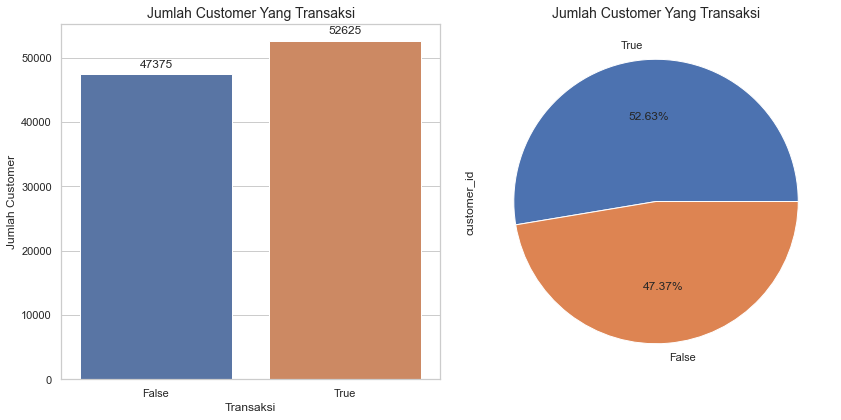

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Count plot
sns.countplot(x=sign_in_cust.index, data=sign_in_cust, ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
axes[0].set_xlabel("Transaksi")
axes[0].set_ylabel("Jumlah Customer")
axes[0].set_title("Jumlah Customer Yang Transaksi", fontsize=14)

# Pie chart
sign_in_cust.value_counts().plot(kind='pie', autopct='%1.2f%%', ax=axes[1])
axes[1].set_title("Jumlah Customer Yang Transaksi", fontsize=14)

plt.tight_layout()
plt.show()

## Merge Data

In [93]:
fixed_df = df_1.drop_duplicates(subset=['customer_id'])

In [94]:
df_rfm = pd.merge(df_rfm, ongkir, on='customer_id', how='left')
df_rfm = pd.merge(df_rfm, total_promo, on='customer_id', how='left')
df = pd.merge(fixed_df, df_rfm, on='customer_id', how='inner')
#df = pd.merge(df, df_1, on='customer_id', how='inner')
df['payment_status'] = df['payment_status'].replace({'Succsess': 'Success'})
df['promo_code'] = df['promo_code'].replace({'0':'NOPROMO'})

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52625 entries, 0 to 52624
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at_x            52625 non-null  datetime64[ns, UTC]
 1   customer_id             52625 non-null  int64              
 2   booking_id              52625 non-null  object             
 3   session_id              52625 non-null  object             
 4   product_metadata        52625 non-null  object             
 5   payment_method          52625 non-null  object             
 6   payment_status          52625 non-null  object             
 7   promo_amount            52625 non-null  int64              
 8   promo_code              52625 non-null  object             
 9   shipment_fee            52625 non-null  int64              
 10  shipment_date_limit     52625 non-null  datetime64[ns, UTC]
 11  shipment_location_lat   52625 non-null  f

## Status Churn Customer

In [96]:
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])

# Menentukan periode waktu untuk memeriksa churn
churn_period = pd.Timedelta(days=180)

# Membuat kolom baru "Churn" dengan nilai awal 0
df['Churn'] = 0

# Menghitung tanggal terakhir dalam dataset
max_date = df['last_purchase_date'].max()

# Looping untuk setiap customer
for i, row in df.groupby('customer_id').last().iterrows():
    last_purchase_date = row['last_purchase_date']
    # Menghitung selisih antara tanggal terakhir dan tanggal pembelian terakhir
    diff = max_date - last_purchase_date
    # Jika selisih lebih besar atau sama dengan periode churn, maka label churn diubah menjadi 1
    if diff >= churn_period:
        df.loc[df['customer_id'] == i, 'Churn'] = 1

In [205]:
# Tanggal terakhir
max_date

Timestamp('2022-12-26 14:18:35.425944+0000', tz='UTC')

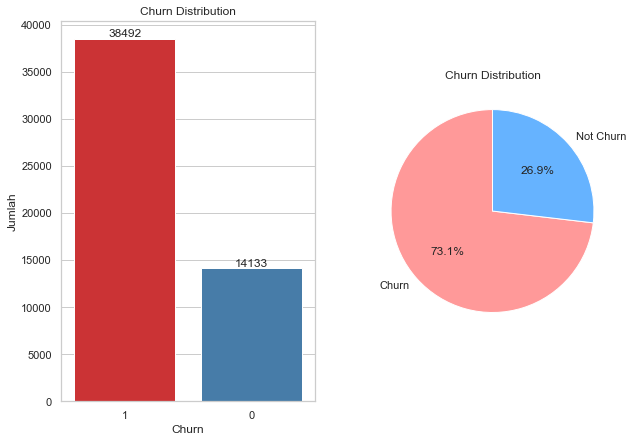

In [97]:
df['Churn']
#df['Churn'].value_counts()
# Gabungkan dua chart dengan fungsi 
def plot_churn(df, Churn):
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    a = sns.countplot(x=Churn, data=df, ax=ax[0], palette='Set1', order=df[Churn].value_counts().index)
    for j in a.containers:
        a.bar_label(j, label_type='edge')
    ax[0].set_title('Churn Distribution')
    ax[0].set_xlabel('Churn')
    ax[0].set_ylabel('Jumlah')
    plt.pie(df[Churn].value_counts(), labels=['Churn','Not Churn'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    ax[1].set_title('Churn Distribution')
    plt.show()
plot_churn(df, 'Churn')

Dari visualisasi pie chart yang dibuat, dapat dilihat bahwa dari total 52.625 customer yang melakukan transaksi, sebanyak 73.1% atau sebanyak 38.495 customer tergolong dalam kategori churn, sedangkan sisanya sebanyak 26.9% atau 14.133 customer tidak mengalami churn. Adapun definisi churn yang digunakan dalam analisis ini adalah apabila customer tidak melakukan transaksi dalam periode waktu 6 bulan terakhir. 

Dalam analisis ini, churn direpresentasikan dengan nilai 1 sedangkan nilai 0 merepresentasikan customer yang tidak mengalami churn.

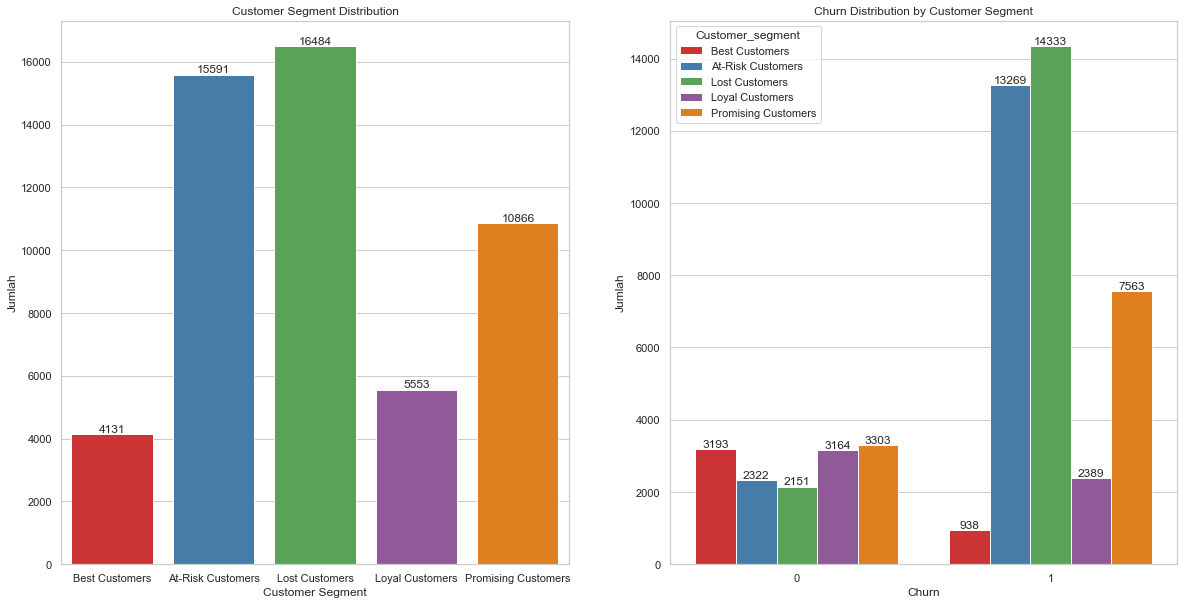

In [98]:
# Plotting customer segment vs Churn
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
a = sns.countplot(x='Customer_segment', data=df, ax=ax[0], palette='Set1')
for j in a.containers:
    a.bar_label(j, label_type='edge')
ax[0].set_title('Customer Segment Distribution')
ax[0].set_xlabel('Customer Segment')
ax[0].set_ylabel('Jumlah')

b = sns.countplot(x='Churn', hue='Customer_segment', data=df, ax=ax[1], palette='Set1')
for j in b.containers:
    b.bar_label(j, label_type='edge')
ax[1].set_title('Churn Distribution by Customer Segment')
ax[1].set_xlabel('Churn')
ax[1].set_ylabel('Jumlah')
plt.show()

In [99]:
segment_churn = df.groupby(["Customer_segment","Churn"])["customer_id"].count()
segment_churn

Customer_segment     Churn
At-Risk Customers    0         2322
                     1        13269
Best Customers       0         3193
                     1          938
Lost Customers       0         2151
                     1        14333
Loyal Customers      0         3164
                     1         2389
Promising Customers  0         3303
                     1         7563
Name: customer_id, dtype: int64

### Device Pengguna

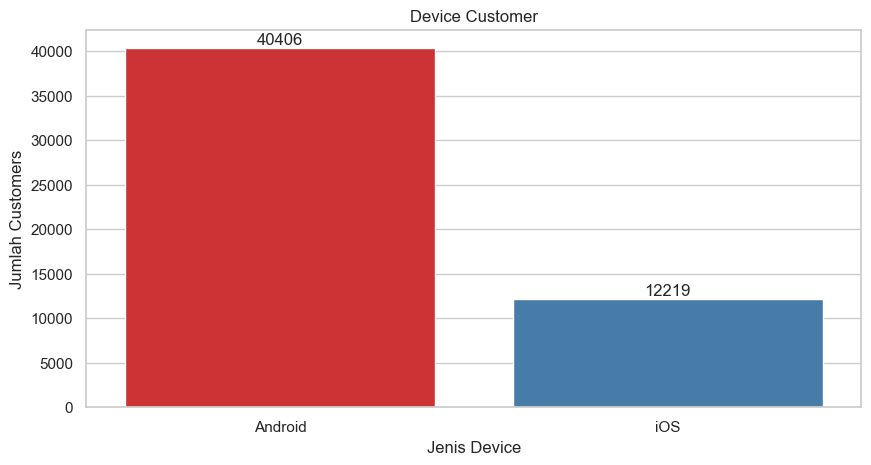

In [100]:
# Device Pengguna
plt.figure(figsize=(10,5), dpi= 100)
a = sns.countplot(x='device_type', data=df, palette='Set1')
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xlabel("Jenis Device")
plt.ylabel("Jumlah Customers")
plt.title("Device Customer")
plt.show()

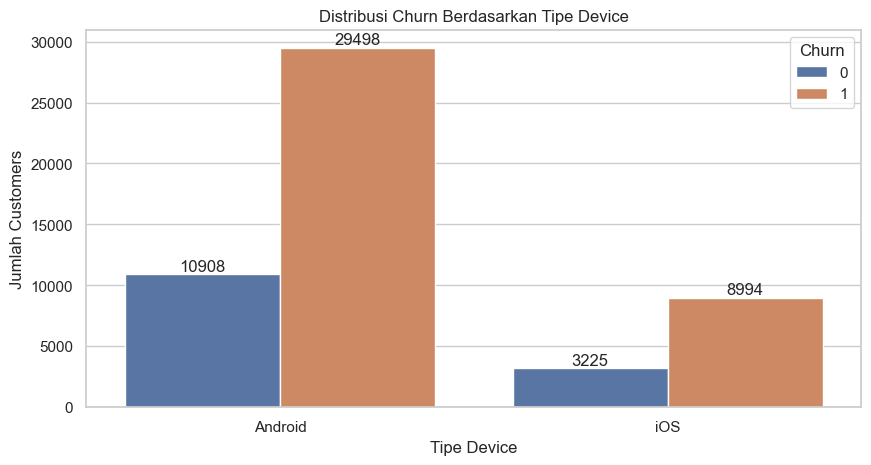

In [101]:
plt.figure(figsize=(10,5), dpi=100)
a = sns.countplot(data=df, x='device_type', hue='Churn')
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xlabel("Tipe Device")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Tipe Device")
plt.show()

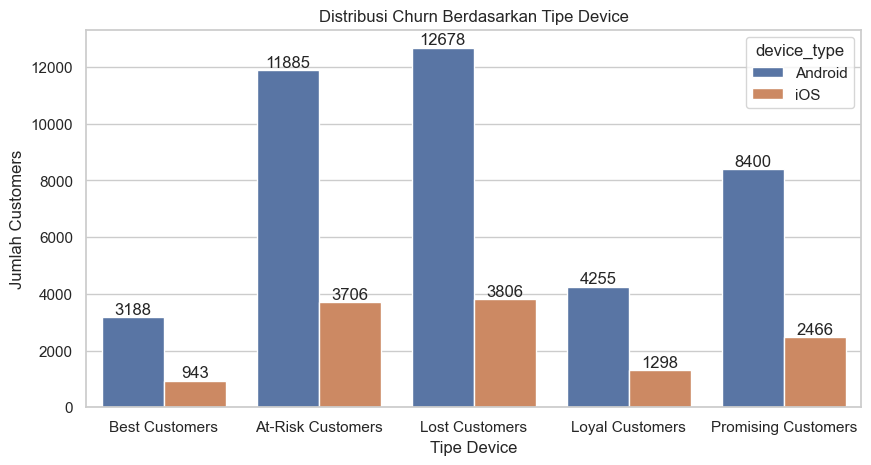

In [102]:
plt.figure(figsize=(10,5), dpi=100)
a = sns.countplot(data=df, x='Customer_segment', hue='device_type')
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xlabel("Tipe Device")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Tipe Device")
plt.show()

### Jenis Kelamin Pengguna

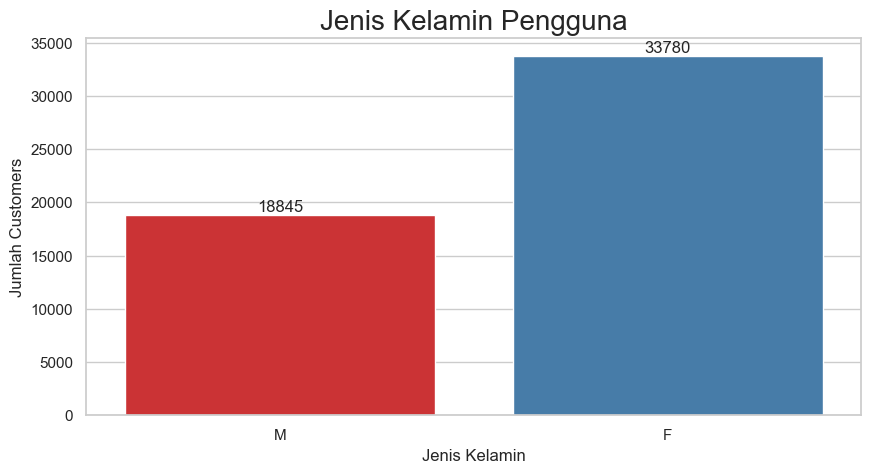

In [103]:
plt.figure(figsize=(10,5), dpi=100)
#a = df_customer['gender'].value_counts()
i = sns.countplot(x='gender', data=df, palette='Set1')
for j in i.containers:
    i.bar_label(j, label_type='edge')
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Customers")
plt.title("Jenis Kelamin Pengguna", fontsize=20)
plt.show()

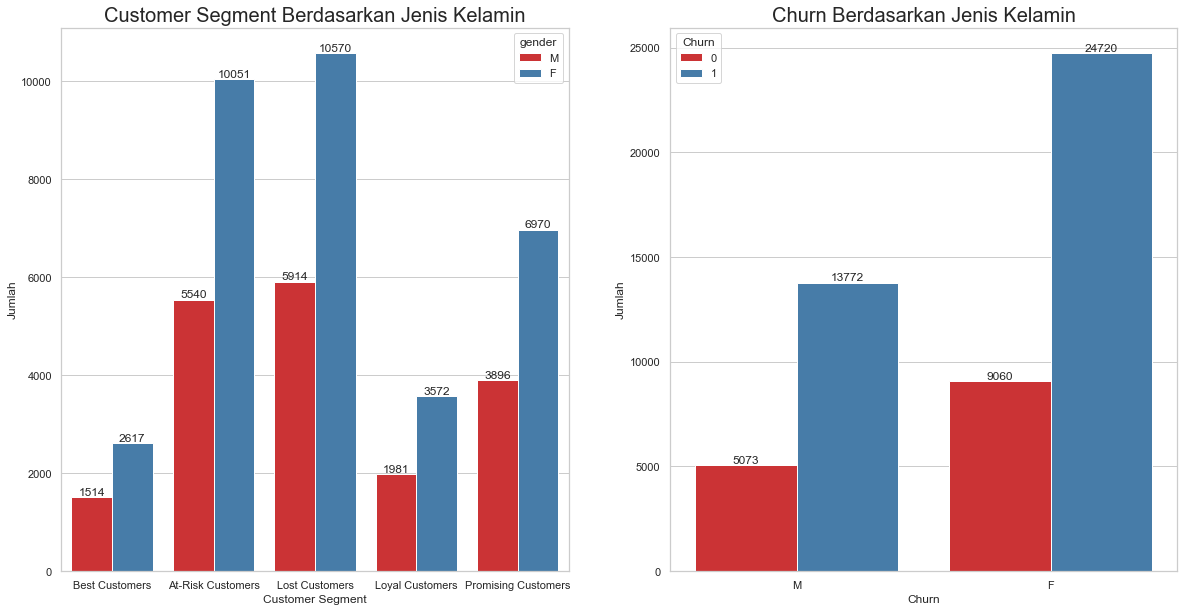

In [104]:
# Plotting customer segment vs Churn
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
a = sns.countplot(x='Customer_segment',hue='gender', data=df, ax=ax[0], palette='Set1')
for j in a.containers:
    a.bar_label(j, label_type='edge')
ax[0].set_title('Customer Segment Berdasarkan Jenis Kelamin', fontsize=20)
ax[0].set_xlabel('Customer Segment')
ax[0].set_ylabel('Jumlah')

b = sns.countplot(x='gender', hue='Churn', data=df, ax=ax[1], palette='Set1')
for j in b.containers:
    b.bar_label(j, label_type='edge')
ax[1].set_title('Churn Berdasarkan Jenis Kelamin', fontsize=20)
ax[1].set_xlabel('Churn')
ax[1].set_ylabel('Jumlah')
plt.show()

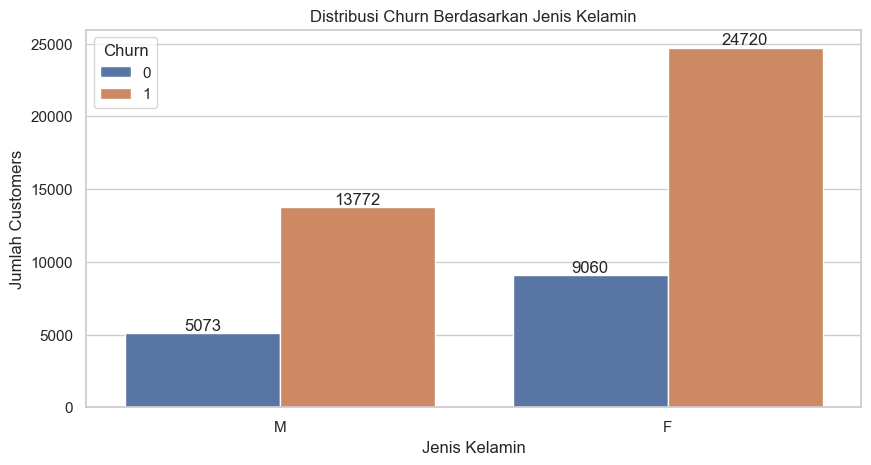

In [105]:
plt.figure(figsize=(10,5), dpi=100)
a = sns.countplot(data=df, x='gender', hue='Churn')
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Jenis Kelamin")
plt.show()

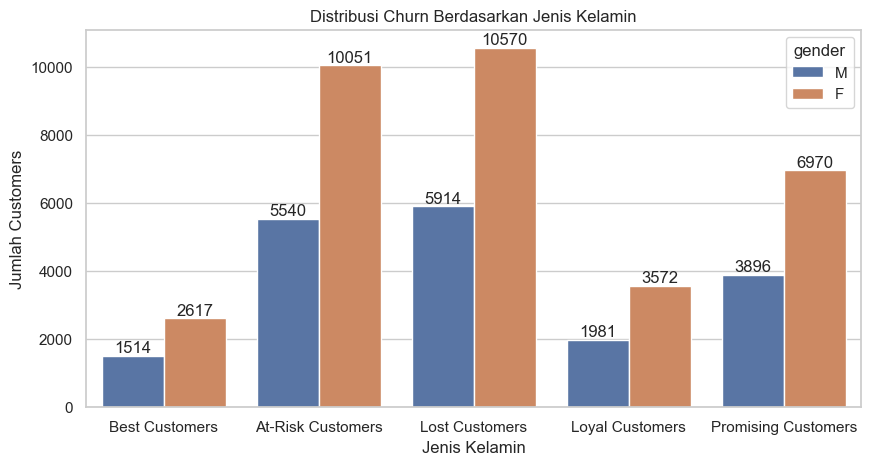

In [106]:
plt.figure(figsize=(10,5), dpi=100)
a = sns.countplot(data=df, x='Customer_segment', hue='gender')
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Jenis Kelamin")
plt.show()

### Bagaimana Jumlah Customer Berdasarkan Tahun Lahirnya?

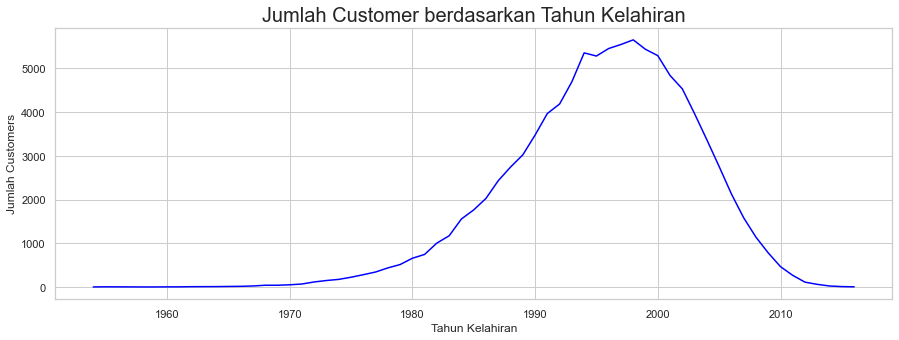

In [107]:
plt.figure(figsize=(15,5))
birth = df_customer.groupby(df_customer['birthdate'].dt.year)[['customer_id']].count()
plt.plot(birth.index, birth['customer_id'], color='blue')
plt.xlabel("Tahun Kelahiran")
plt.ylabel("Jumlah Customers")
plt.title("Jumlah Customer berdasarkan Tahun Kelahiran", fontsize=20)
plt.show()

### Bagaimana Jumlah Customer Berdasarkan Provinsi?

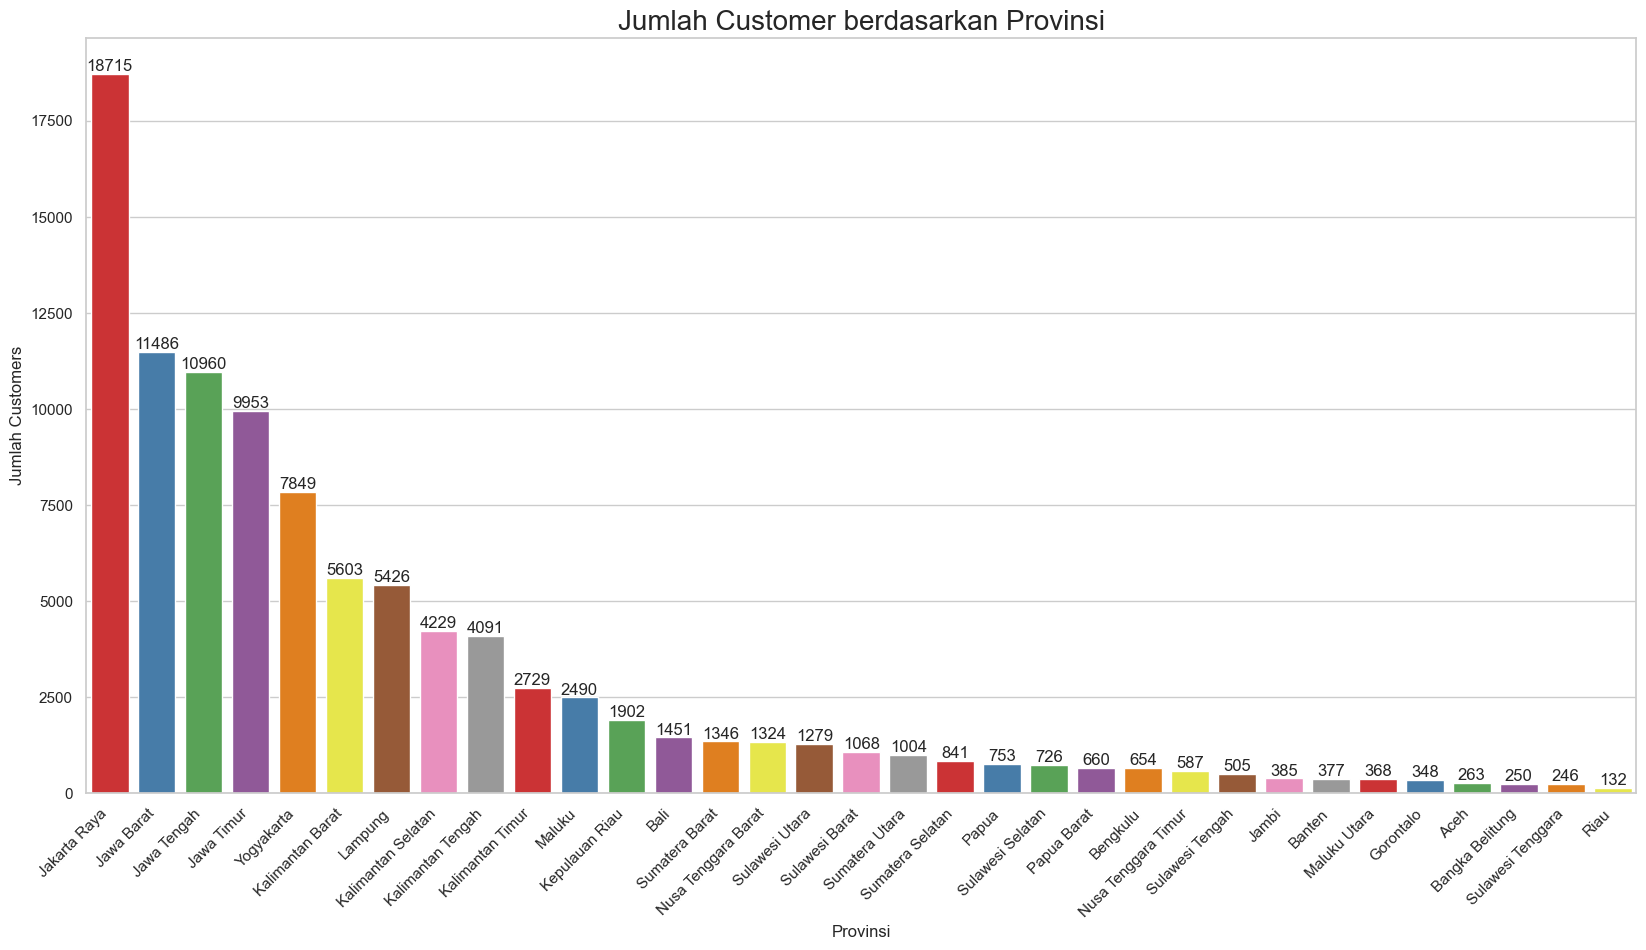

In [108]:
plt.figure(figsize=(20,10), dpi=100)
rumah = df_customer.groupby('home_location')[['customer_id']].count().reset_index().sort_values(by='customer_id', ascending=False)
a = sns.barplot(data=rumah, x='home_location', y='customer_id', palette='Set1')
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Provinsi")
plt.ylabel("Jumlah Customers")
plt.title("Jumlah Customer berdasarkan Provinsi", fontsize=20)
plt.show()

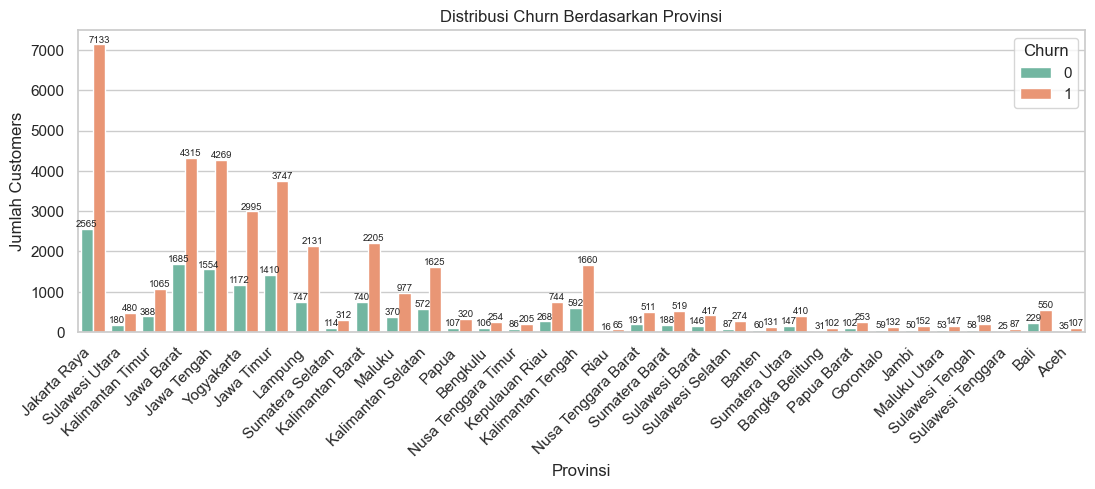

In [109]:
plt.figure(figsize=(13,4), dpi=100)
a = sns.countplot(x='home_location', hue='Churn', data=df, palette="Set2")
for j in a.containers:
    a.bar_label(j, label_type='edge', fontsize=7)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Provinsi")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn Berdasarkan Provinsi")
plt.show()

In [110]:
home_churn = df.groupby(["home_location","Churn"])["customer_id"].count()

print(home_churn)

home_location     Churn
Aceh              0          35
                  1         107
Bali              0         229
                  1         550
Bangka Belitung   0          31
                           ... 
Sumatera Selatan  1         312
Sumatera Utara    0         147
                  1         410
Yogyakarta        0        1172
                  1        2995
Name: customer_id, Length: 66, dtype: int64


### Product apa yang paling banyak berdasarkan Gender?

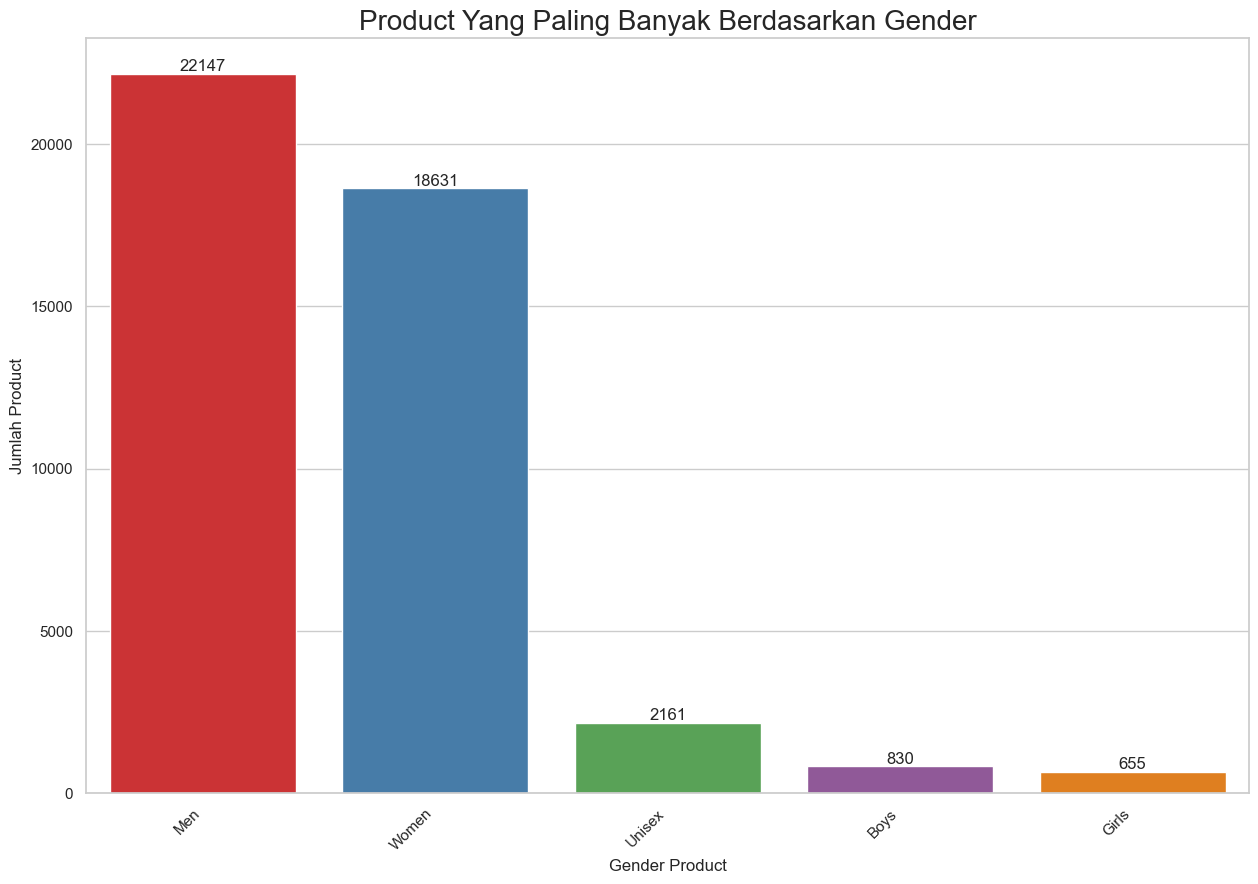

In [111]:
plt.figure(figsize=(15,10), dpi=100)
product = df_product.groupby('gender_product')[['id']].count().reset_index().sort_values(by='id', ascending=False)
a = sns.barplot(data=product, x='gender_product', y='id', palette='Set1')
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Gender Product")
plt.ylabel("Jumlah Product")
plt.title("Product Yang Paling Banyak Berdasarkan Gender", fontsize=20)
plt.show()

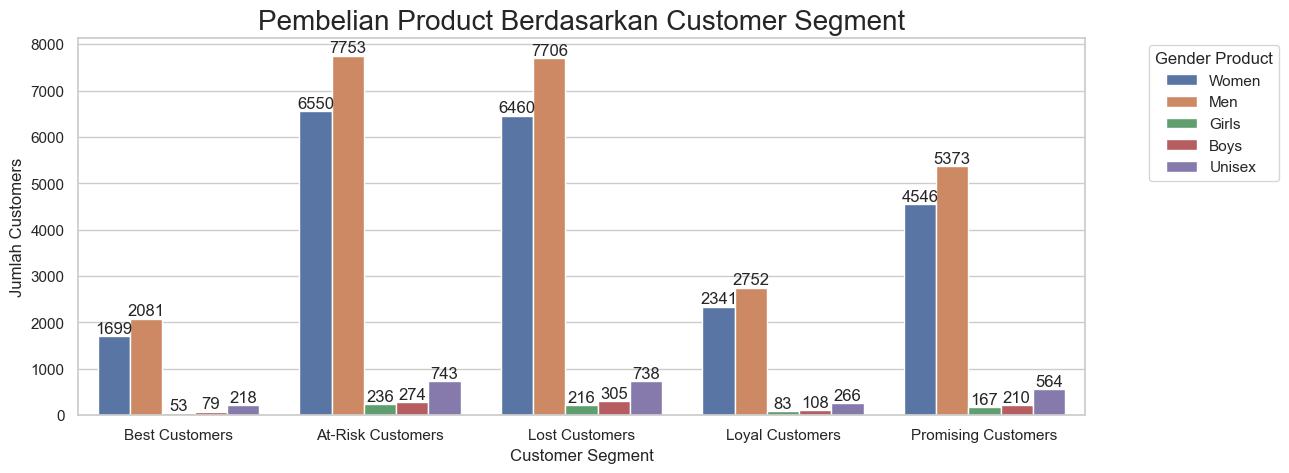

In [112]:
plt.figure(figsize=(13,5), dpi=100)
a = sns.countplot(data=df, x='Customer_segment', hue='gender_product')
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xlabel("Customer Segment")
plt.ylabel("Jumlah Customers")
plt.title("Pembelian Product Berdasarkan Customer Segment", fontsize=20)
plt.legend(loc='upper right', title = "Gender Product", bbox_to_anchor=(1.2, 1))
plt.show()

### Master Product apa yang paling banyak?

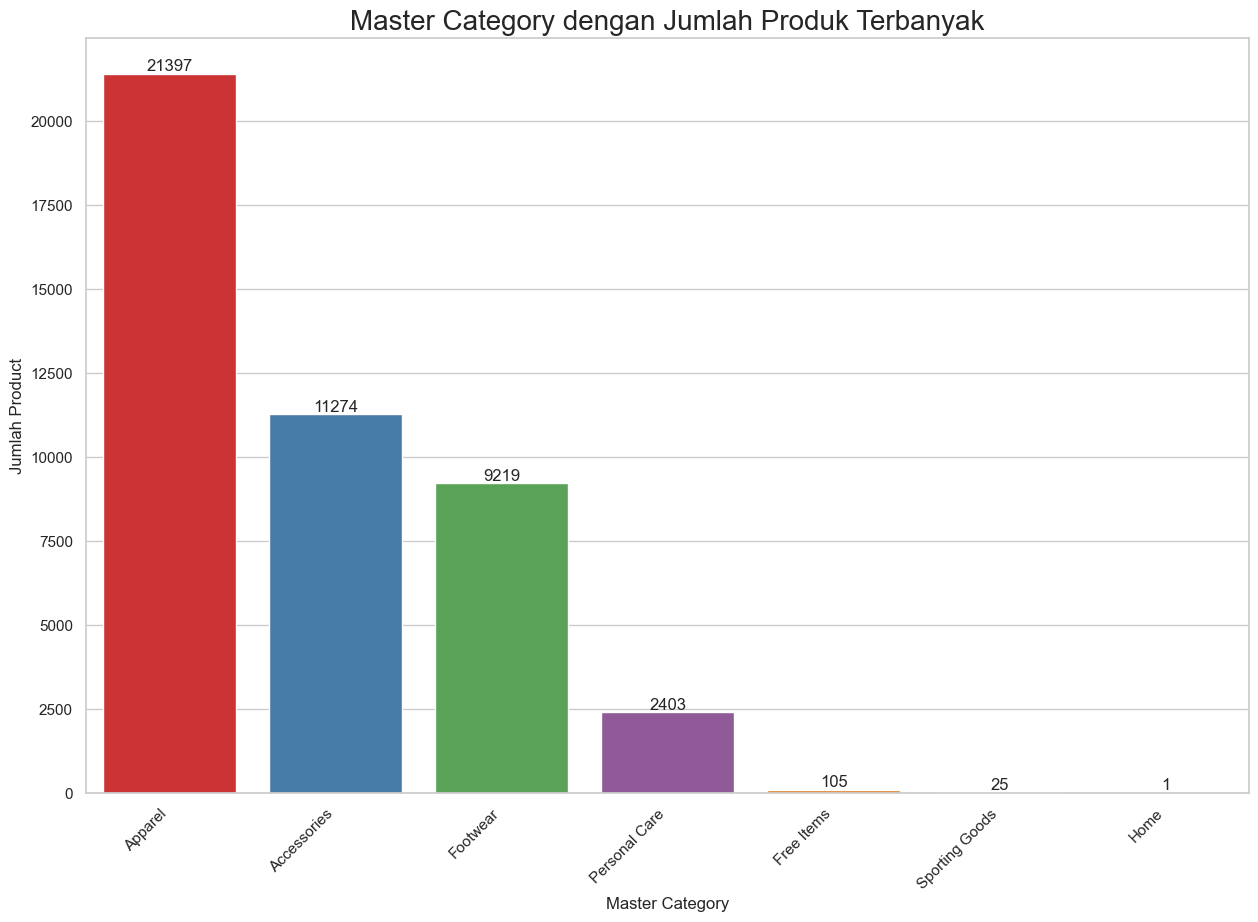

In [113]:
plt.figure(figsize=(15,10), dpi=100)
category = df_product.groupby('masterCategory')[['id']].count().reset_index().sort_values(by='id', ascending=False)
a = sns.barplot(data=category, x='masterCategory', y='id', palette='Set1')
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Master Category")
plt.ylabel("Jumlah Product")
plt.title("Master Category dengan Jumlah Produk Terbanyak", fontsize=20)
plt.show()

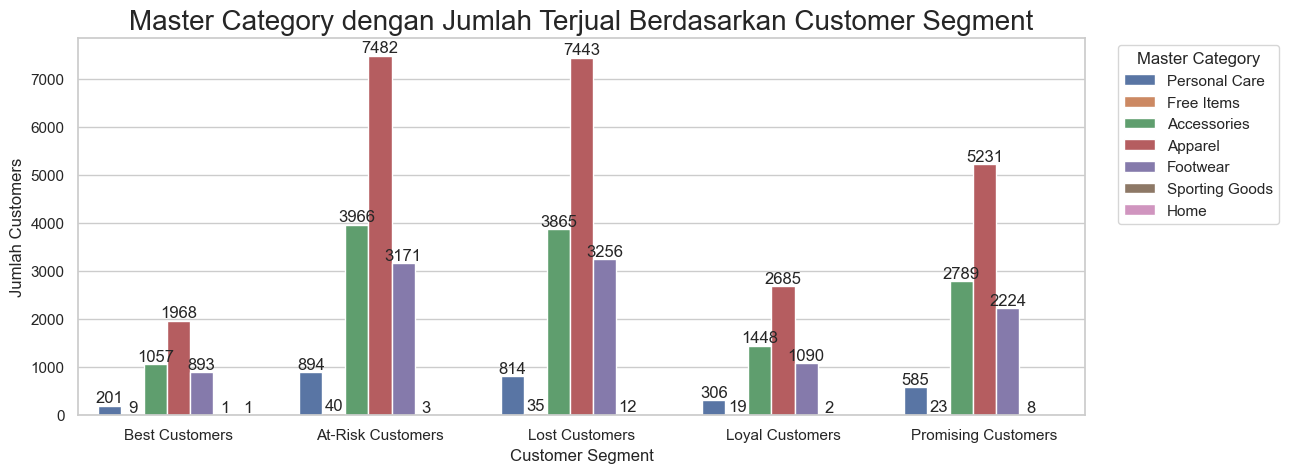

In [114]:
plt.figure(figsize=(13,5), dpi=100)
a = sns.countplot(data=df, x='Customer_segment', hue='masterCategory')
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xlabel("Customer Segment")
plt.ylabel("Jumlah Customers")
plt.title("Master Category dengan Jumlah Terjual Berdasarkan Customer Segment", fontsize=20)
plt.legend(loc='upper right', title = "Master Category", bbox_to_anchor=(1.2, 1))
plt.show()

### Status Pembayaran pengguna

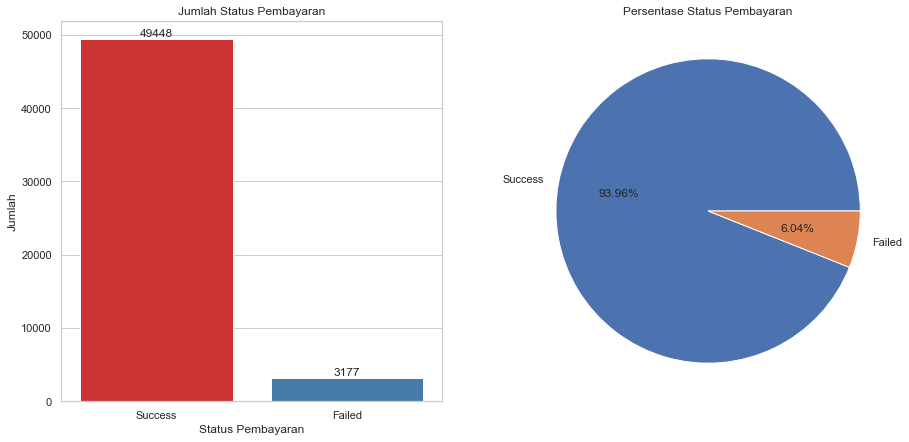

In [115]:
# Plotting customer segment vs Churn
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
a = sns.countplot(x='payment_status', data=df, ax=ax[0], palette='Set1')
for j in a.containers:
    a.bar_label(j, label_type='edge')
ax[0].set_title('Jumlah Status Pembayaran')
ax[0].set_xlabel('Status Pembayaran')
ax[0].set_ylabel('Jumlah')

df.payment_status.value_counts().plot.pie(autopct='%1.2f%%', ax=ax[1])
ax[1].set_title('Persentase Status Pembayaran')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.show()

### Bagaimana distribusi churn berdasarkan type pembayaran?

In [116]:
# Churn Customer Berdasarkan Type Pembayaran
df_churn = df.groupby(['payment_method', 'Churn'])['customer_id'].count().reset_index()
df_churn.columns = ['payment_method', 'Churn', 'jumlah']
#df_churn

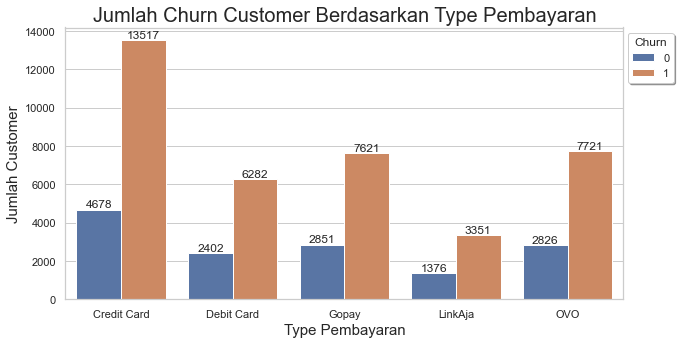

In [117]:
plt.figure(figsize=(10,5))
a = sns.barplot(x='payment_method', y='jumlah', hue='Churn', data=df_churn)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah Churn Customer Berdasarkan Type Pembayaran', fontsize=20)  
plt.ylabel('Jumlah Customer', fontsize=15)
plt.xlabel('Type Pembayaran', fontsize=15)
plt.legend(title='Churn', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.show()

### Metode Pembayaran yang palin banyak digunakan

In [118]:
df['payment_method'].value_counts()

Credit Card    18195
OVO            10547
Gopay          10472
Debit Card      8684
LinkAja         4727
Name: payment_method, dtype: int64

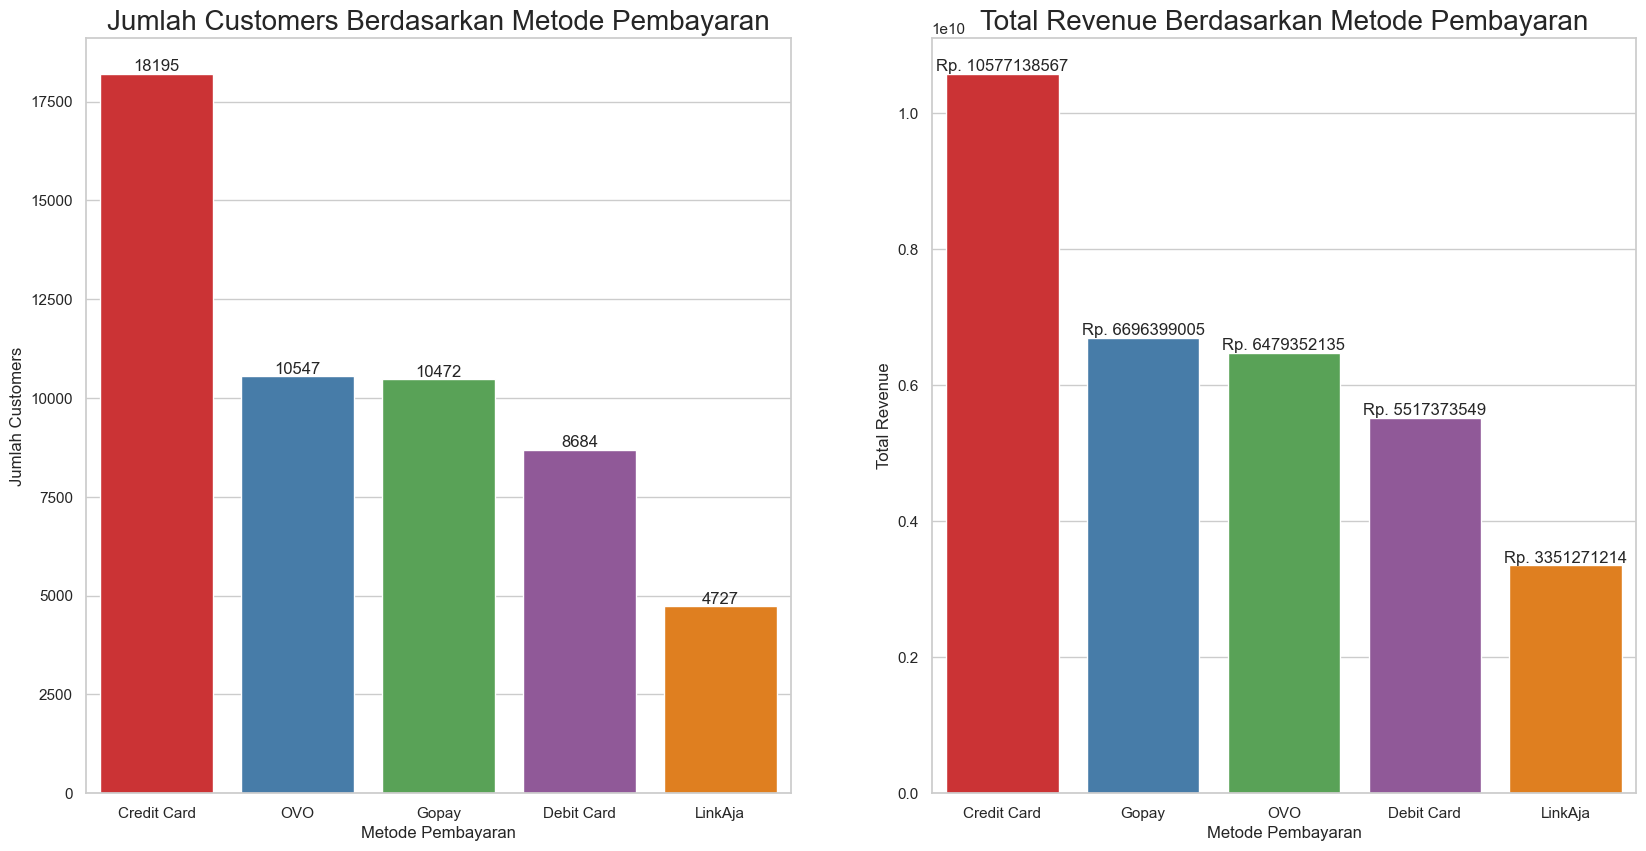

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10),dpi=100)

# Bar plot jumlah metode pembayaran
pay_method = df.groupby('payment_method')['customer_id'].count().reset_index().sort_values(by='customer_id', ascending=False)
b = sns.barplot(data=pay_method, x='payment_method', y='customer_id', palette='Set1', ax=ax[0])
for j in b.containers:
    b.bar_label(j, label_type='edge')
ax[0].set_title('Jumlah Customers Berdasarkan Metode Pembayaran', fontsize=20)
ax[0].set_xlabel('Metode Pembayaran')
ax[0].set_ylabel('Jumlah Customers')

# Bar plot revenue berdasarkan metode pembayaran
rev = df.groupby('payment_method')['total_amount'].sum().reset_index().sort_values(by='total_amount', ascending=False)
a = sns.barplot(data=rev, x='payment_method', y='total_amount', palette='Set1', ax=ax[1])
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='Rp. %.0f')
ax[1].set_title('Total Revenue Berdasarkan Metode Pembayaran', fontsize=20)
ax[1].set_xlabel('Metode Pembayaran')
ax[1].set_ylabel('Total Revenue')

plt.show()


### Metode pembayaran dengan Total Revenue tertinggi

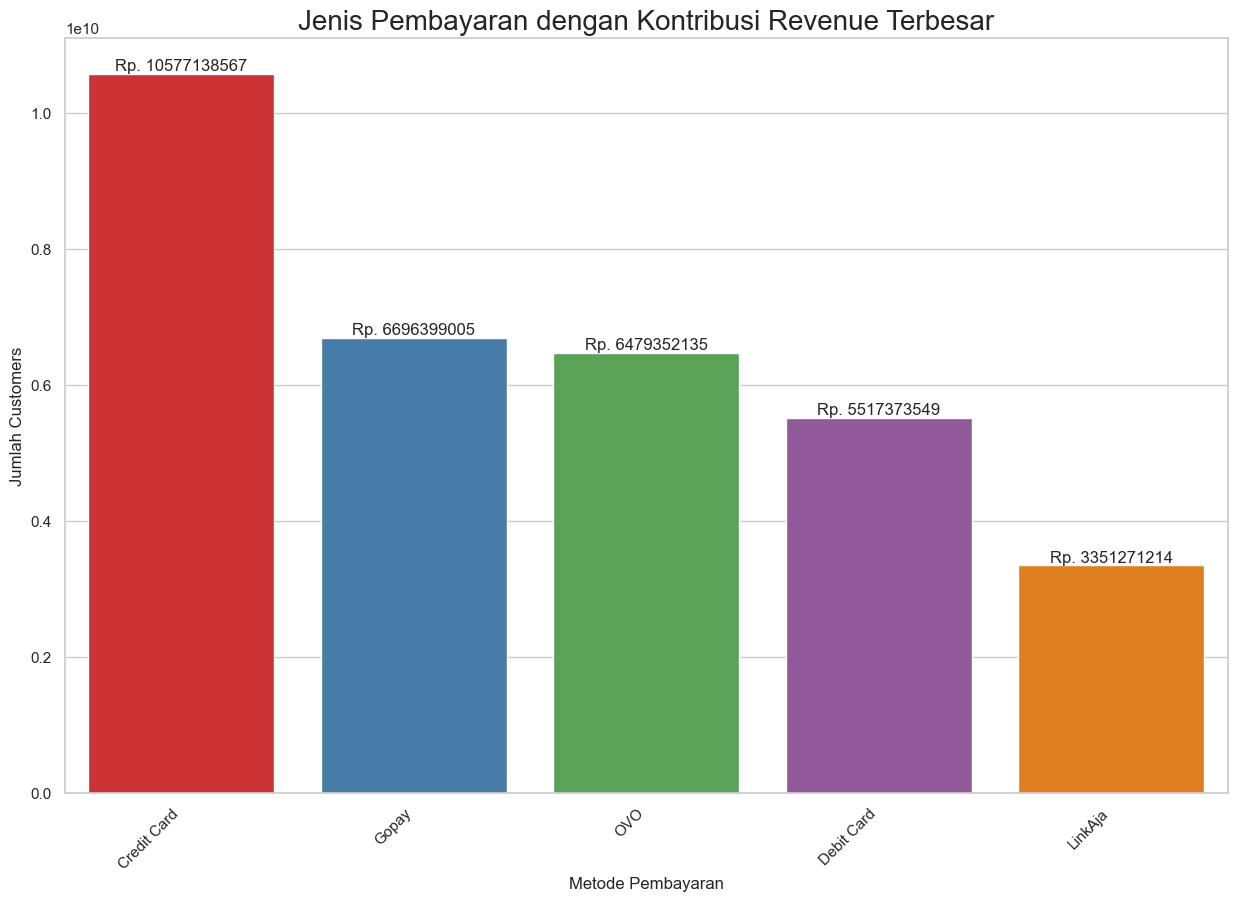

In [120]:
plt.figure(figsize=(15,10), dpi=100)
rev = df.groupby('payment_method')[['total_amount']].sum().reset_index().sort_values(by='total_amount', ascending=False)
a = sns.barplot(data=rev, x='payment_method', y='total_amount', palette='Set1')
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='Rp. %.0f')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Customers")
plt.title("Jenis Pembayaran dengan Kontribusi Revenue Terbesar", fontsize=20)
plt.show()

In [121]:
rev = df.groupby('payment_method')[['total_amount']].sum().reset_index().sort_values(by='total_amount', ascending=False)
rev

payment_method  total_amount
0    Credit Card   10577138567
2          Gopay    6696399005
4            OVO    6479352135
1     Debit Card    5517373549
3        LinkAja    3351271214

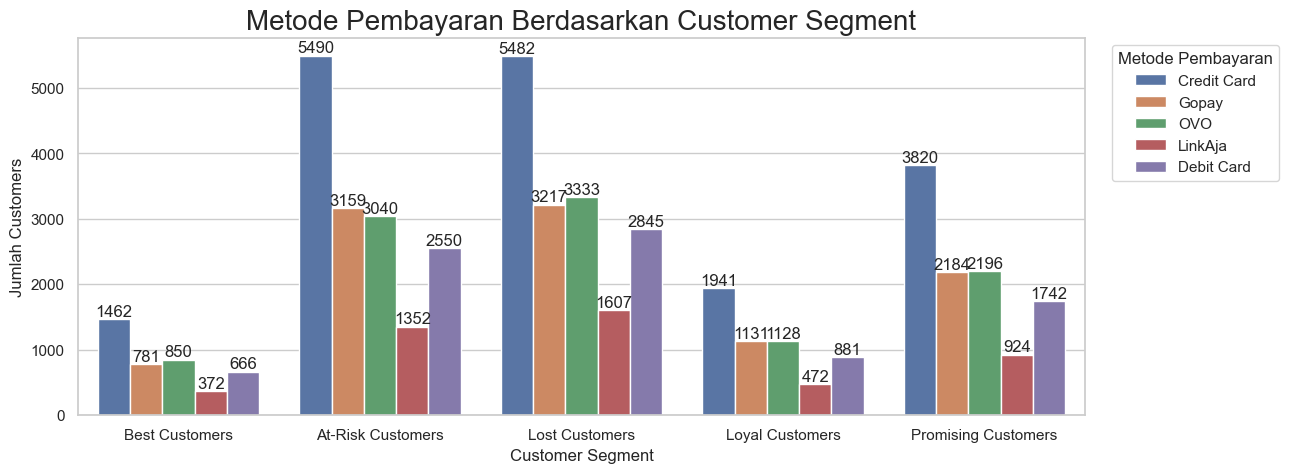

In [122]:
plt.figure(figsize=(13,5), dpi=100)
a = sns.countplot(data=df, x='Customer_segment', hue='payment_method')
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xlabel("Customer Segment")
plt.ylabel("Jumlah Customers")
plt.title("Metode Pembayaran Berdasarkan Customer Segment", fontsize=20)
plt.legend(loc='upper right', title = "Metode Pembayaran", bbox_to_anchor=(1.2, 1))
plt.show()

### Trend metode pembayaran berdasarkan tahun

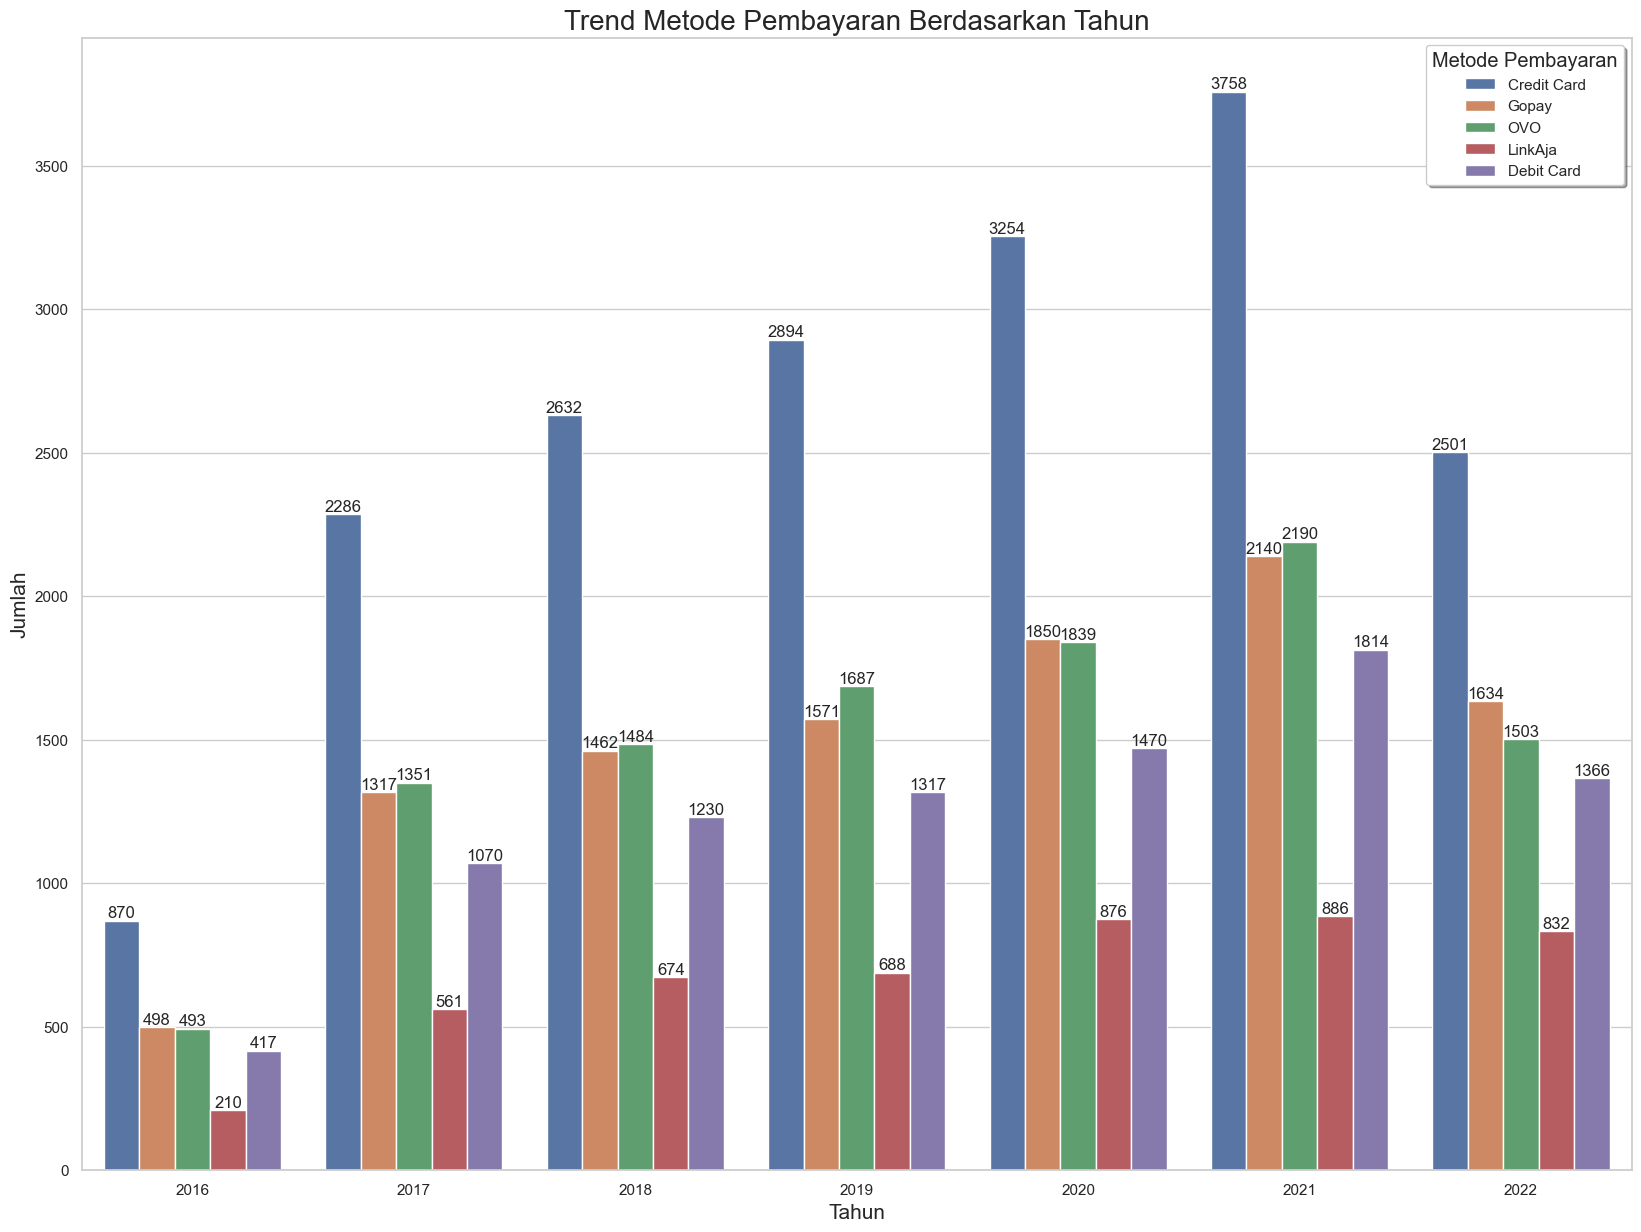

In [123]:
df['type_buy_tahun'] = df['created_at_x'].dt.year
plt.figure(figsize=(20,15), dpi=100)
a = sns.countplot('type_buy_tahun', hue='payment_method', data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Trend Metode Pembayaran Berdasarkan Tahun', fontsize=20)
plt.ylabel('Jumlah', fontsize=15)
plt.xlabel('Tahun', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, title='Metode Pembayaran', title_fontsize='large', shadow=True)
plt.show()


### Metode pembayaran yang paling banyak digunakan berdasarkan Bulan

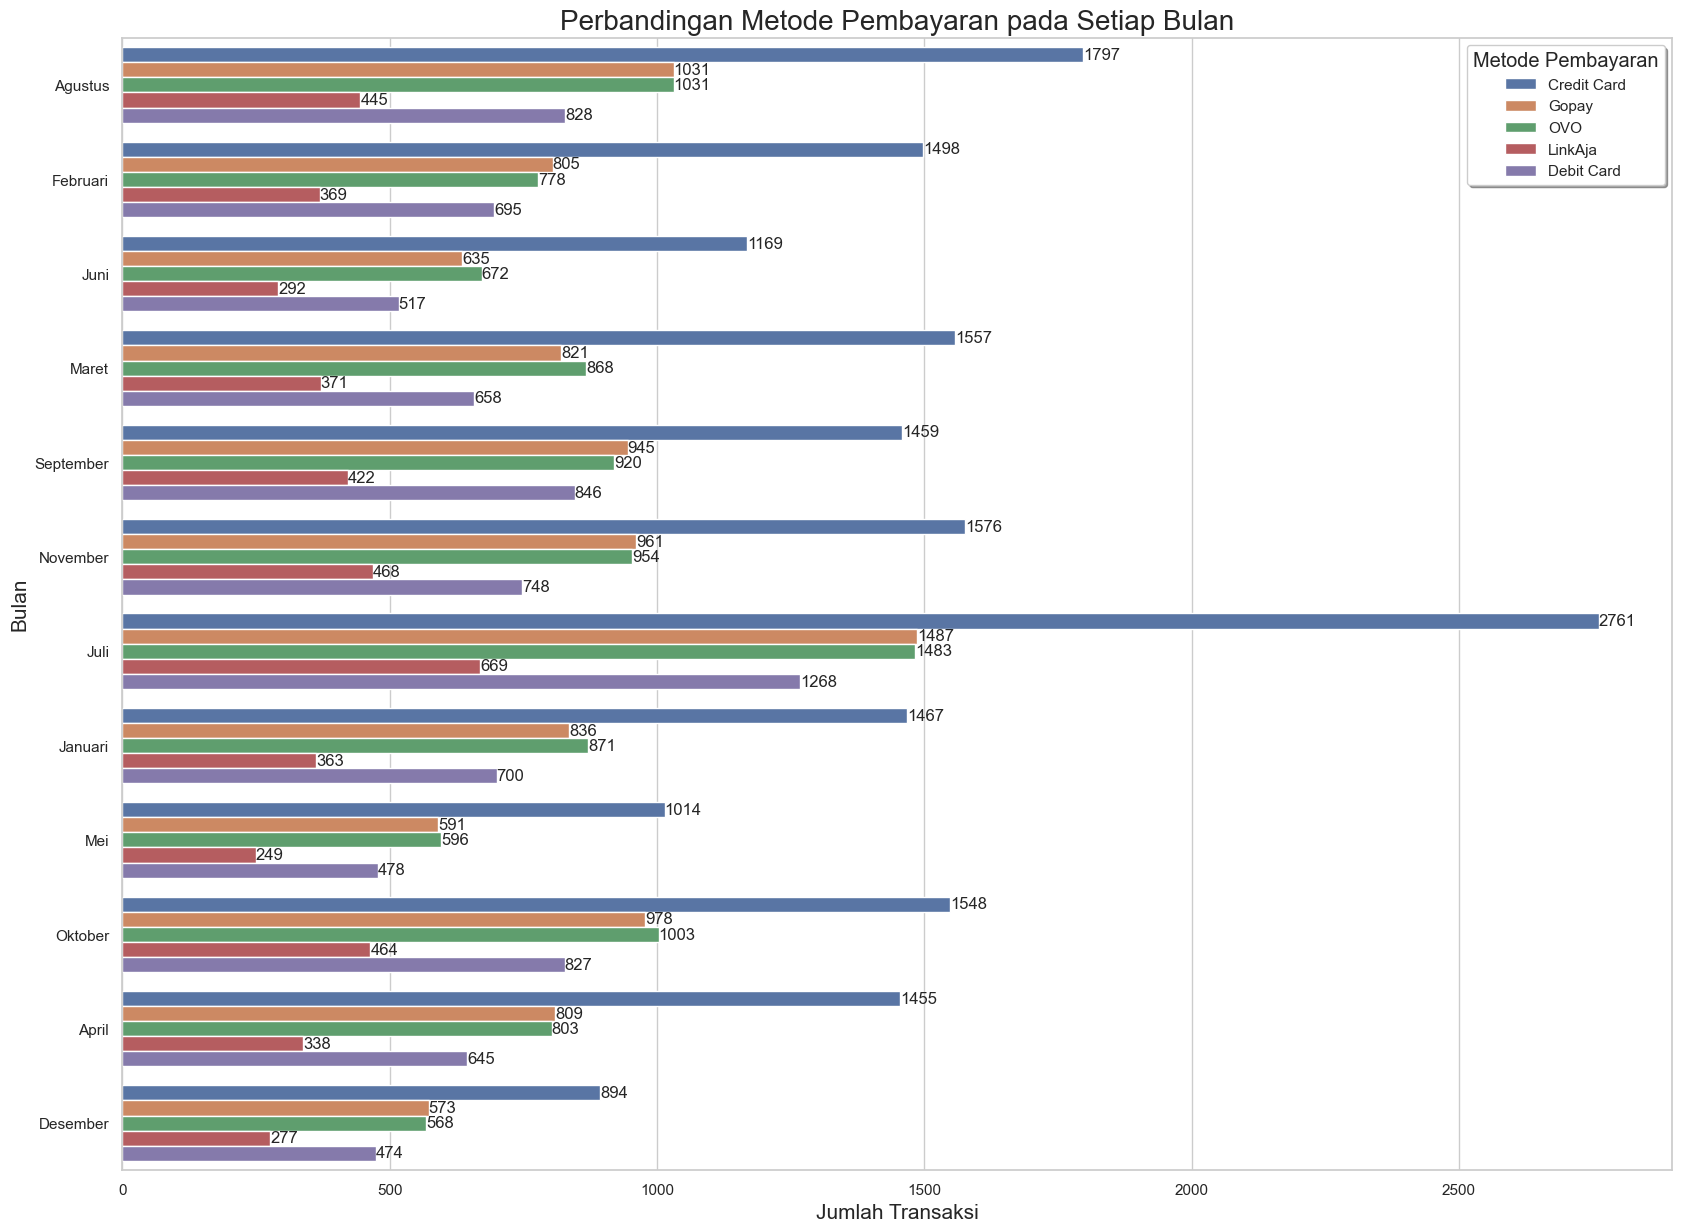

In [124]:
bulan_cols = {1:'Januari', 2:'Februari', 3:'Maret', 4:'April', 5:'Mei', 6:'Juni', 7:'Juli', 8:'Agustus', 9:'September', 10:'Oktober', 11:'November', 12:'Desember'}
df['type_buy_bulan'] = df['created_at_x'].dt.month.map(bulan_cols)
plt.figure(figsize=(20,15), dpi=100)
a = sns.countplot(y='type_buy_bulan', hue='payment_method', data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Perbandingan Metode Pembayaran pada Setiap Bulan', fontsize=20)
plt.xlabel('Jumlah Transaksi', fontsize=15)
plt.ylabel('Bulan', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, title='Metode Pembayaran', title_fontsize='large', shadow=True)
plt.show()

### Hari yang paling banyak dilakukan transaksi?

In [125]:
#Berdasarkan hari dalam seminggu
df['hari'] = df['created_at_x'].dt.dayofweek
day_buy = df.groupby(['customer_id'])['hari'].max(df['hari'].count())
day_buy = pd.DataFrame(data = day_buy).reset_index()

day_name = {0 : 'Senin', 1 : 'Selasa', 2 : 'Rabu', 3 : 'Kamis', 4 : "Jum'at", 5 : 'Sabtu', 6 : 'Minggu'}
df['day_name'] = df['hari'].map(day_name)
day_buy['modus_day_buy'] = day_buy['hari'].map(day_name)

#day_buy['modus_day_buy'].value_counts()

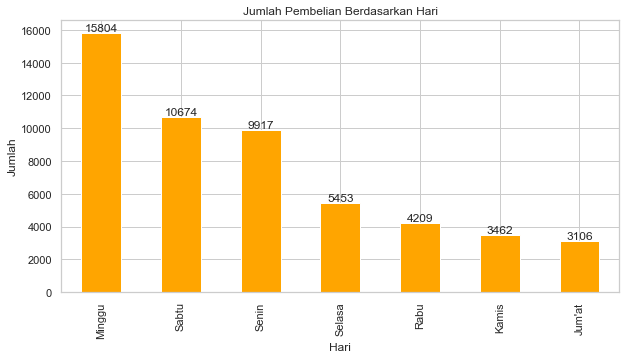

In [126]:
plt.figure(figsize=(10,5))
a = df.groupby(df["day_name"])["customer_id"].count().sort_values(ascending=False).plot(kind="bar", color = "orange")
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah Pembelian Berdasarkan Hari')
plt.ylabel('Jumlah')
plt.xlabel('Hari')
plt.show()

### Bagaimana transaksi berdasarkan Bulan?

In [127]:
bulan = {1 : 'Januari', 2 : 'Februari', 3 : 'Maret', 4 : 'April', 5 : 'Mei', 6 : 'Juni', 7 : 'Juli', 8 : 'Agustus', 9 : 'September', 10 : 'Oktober', 11 : 'November', 12 : 'Desember'}
df['bulan'] = df['created_at_x'].dt.month
df['bulan'] = df['bulan'].map(bulan)


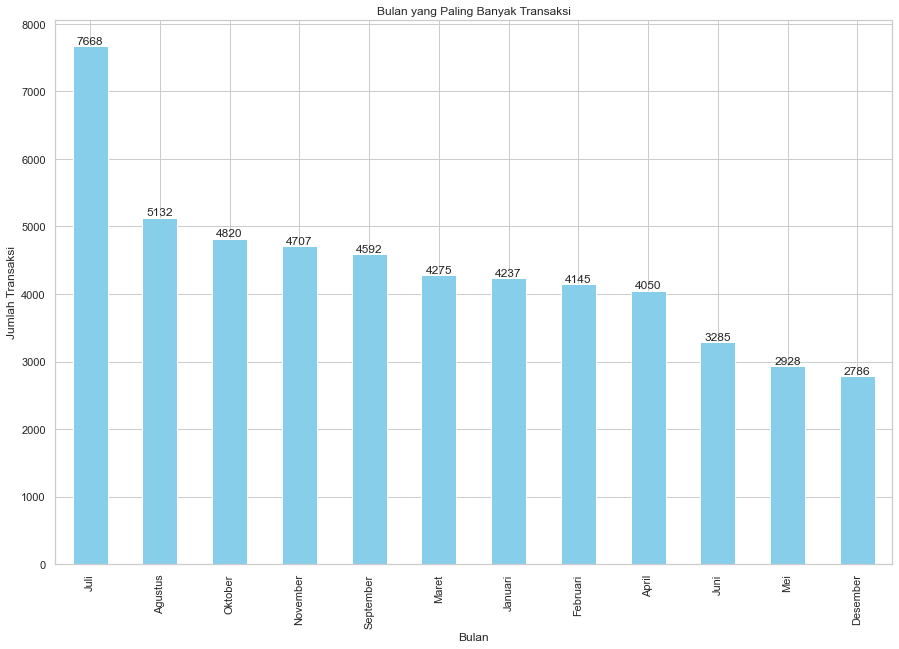

In [128]:
plt.figure(figsize=(15,10))
a = df.groupby(df['bulan'])["customer_id"].count().sort_values(ascending=False).plot(kind="bar", color = "skyblue")
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.title("Bulan yang Paling Banyak Transaksi")
plt.show()

### Bagaimana transaksi berdasarkan Tahun?

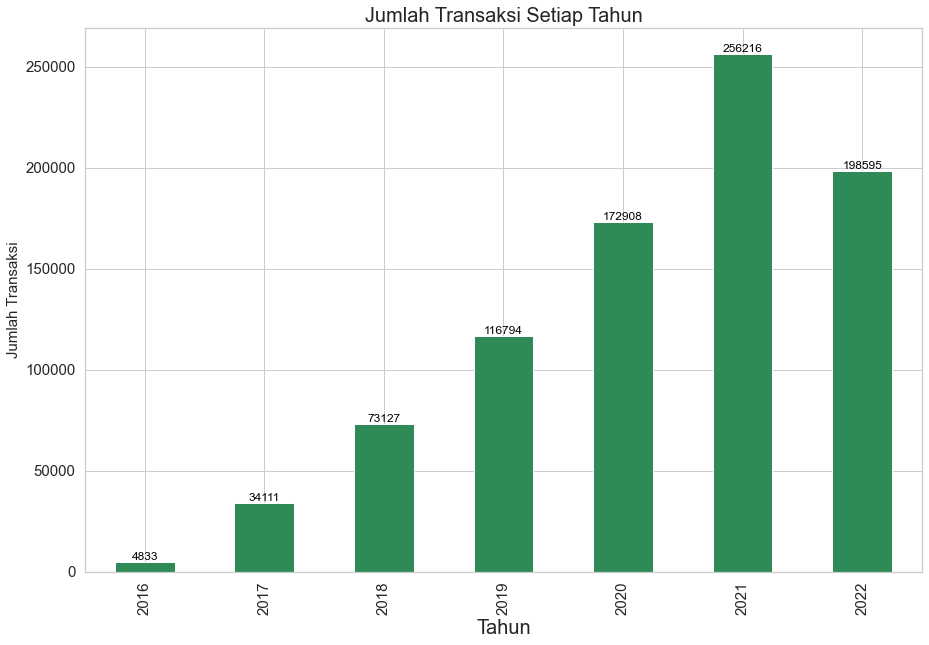

In [129]:
plt.figure(figsize=(15,10))
a = df_trans.groupby(df_trans["created_at"].dt.year)["customer_id"].count().plot(kind="bar", color = "seagreen", fontsize=15)
for j in a.containers:
    a.bar_label(j, label_type='edge', color='black')
plt.xlabel("Tahun", fontsize=20)
plt.ylabel("Jumlah Transaksi", fontsize=15)
plt.title("Jumlah Transaksi Setiap Tahun", fontsize=20)
plt.show()

### Promo yang paling banyak digunakan

In [130]:
most_promo_code = df.groupby(['promo_code'])['customer_id'].count().sort_values(ascending=False)
most_promo_code

promo_code
NOPROMO          32714
WEEKENDSERU       5799
AZ2022            3734
BUYMORE           2889
WEEKENDMANTAP     2081
XX2022            2061
LIBURDONG         2047
SC2022             665
STARTUP            635
Name: customer_id, dtype: int64

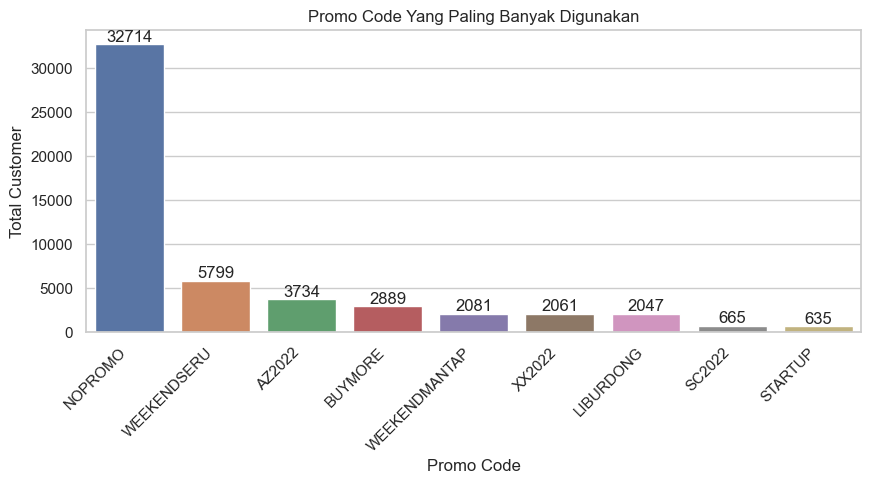

In [131]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.barplot(x=most_promo_code.index, y=most_promo_code.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=45, ha='right')
plt.title('Promo Code Yang Paling Banyak Digunakan')
plt.ylabel('Total Customer')
plt.xlabel('Promo Code')
plt.show()

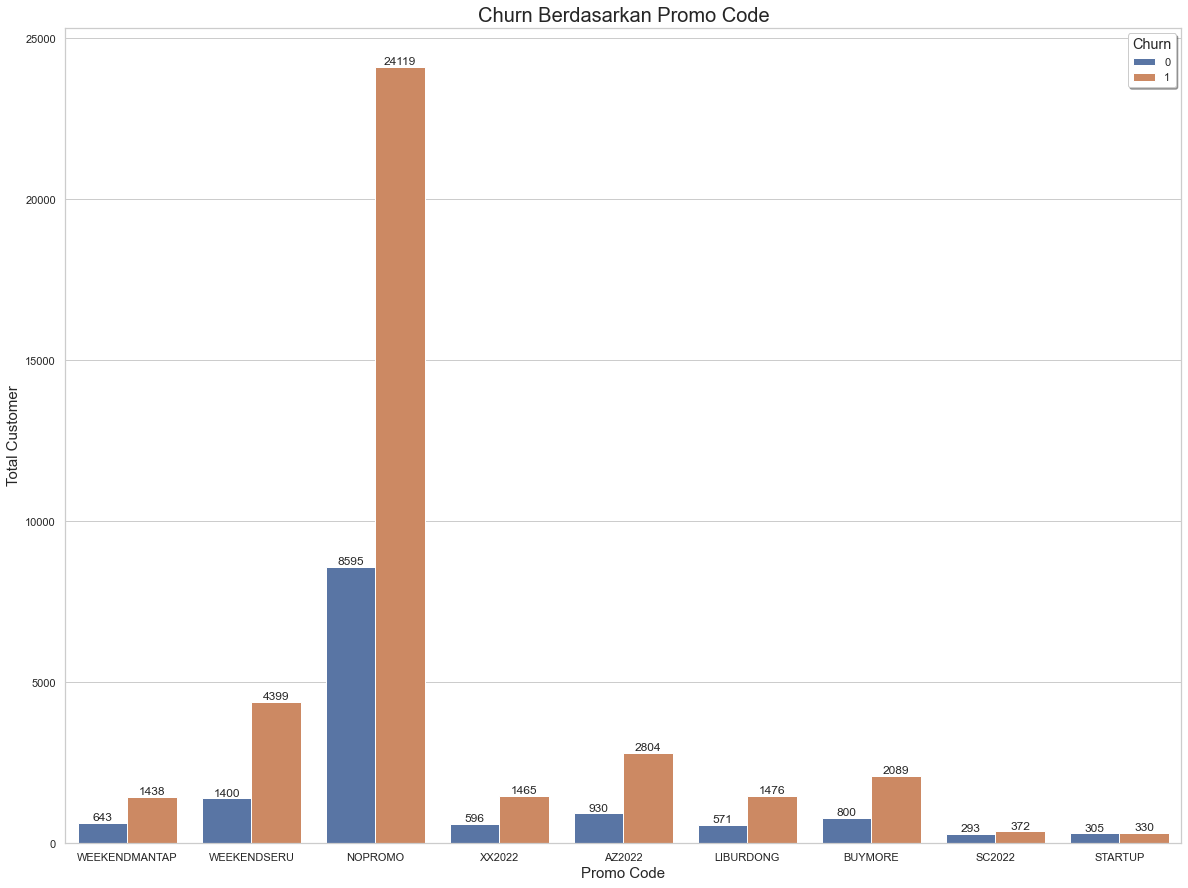

In [132]:
# Churn berdasarkan promo code
plt.figure(figsize=(20,15))
a = sns.countplot(x='promo_code', hue='Churn', data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Churn Berdasarkan Promo Code', fontsize=20)
plt.ylabel('Total Customer', fontsize=15)
plt.xlabel('Promo Code', fontsize=15)
plt.legend(title='Churn',shadow=True, facecolor='white', title_fontsize='large')
plt.show()    

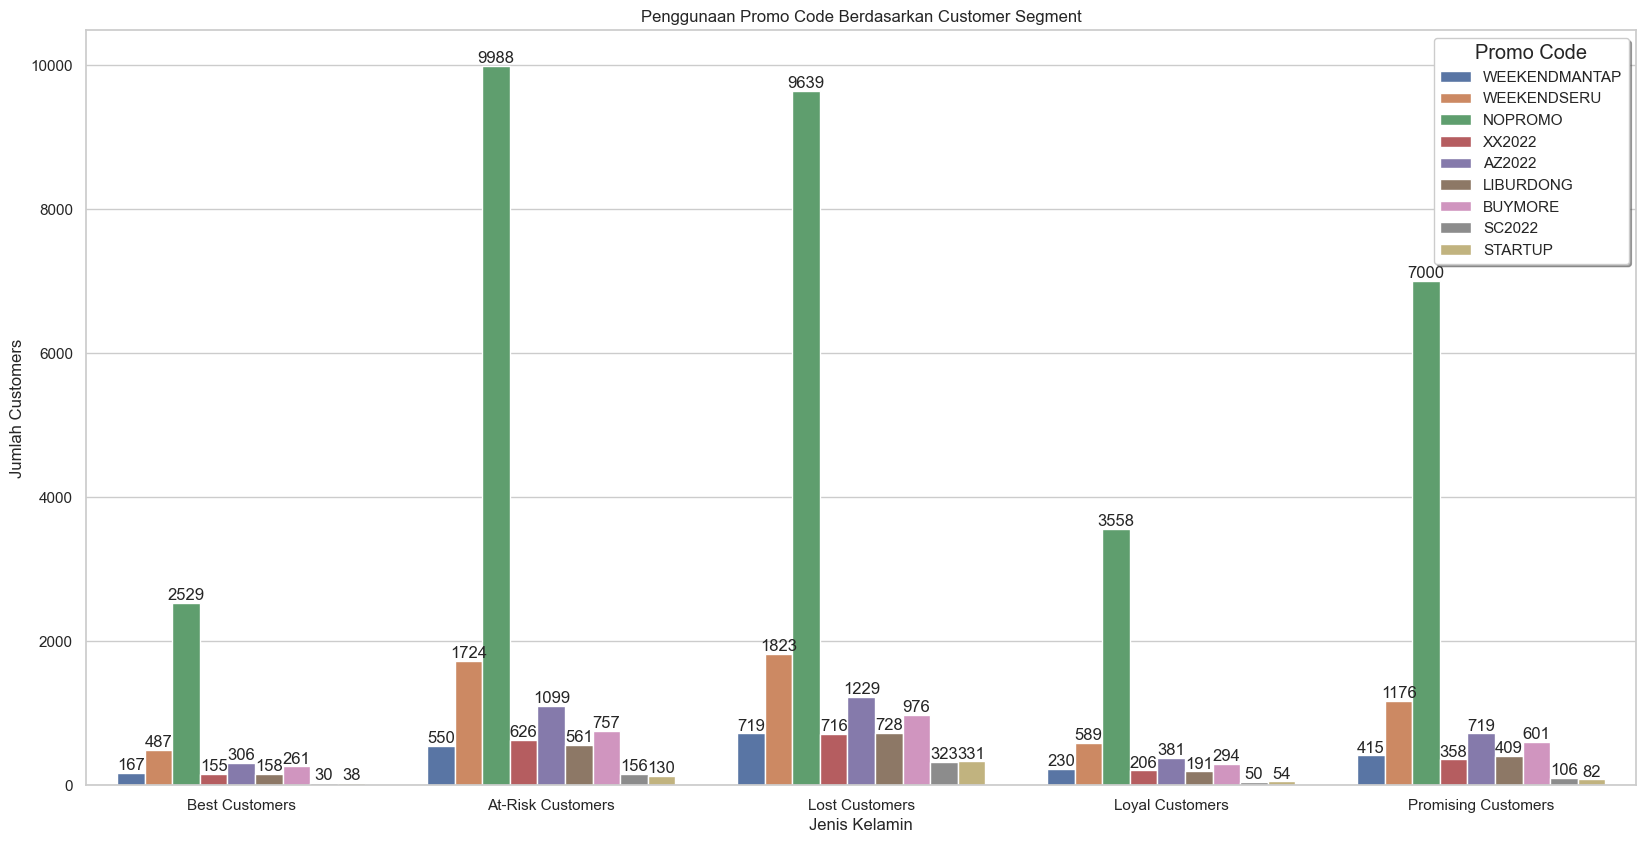

In [133]:
plt.figure(figsize=(20,10), dpi=100)
a = sns.countplot(data=df, x='Customer_segment', hue='promo_code')
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Customers")
plt.title("Penggunaan Promo Code Berdasarkan Customer Segment")
plt.legend(title='Promo Code',shadow=True, facecolor='white', title_fontsize='large',bbox_to_anchor=(1, 1), ncol=1)
plt.show()

### Churn Berdasarkan Shipment_fee atau ongkos kirim

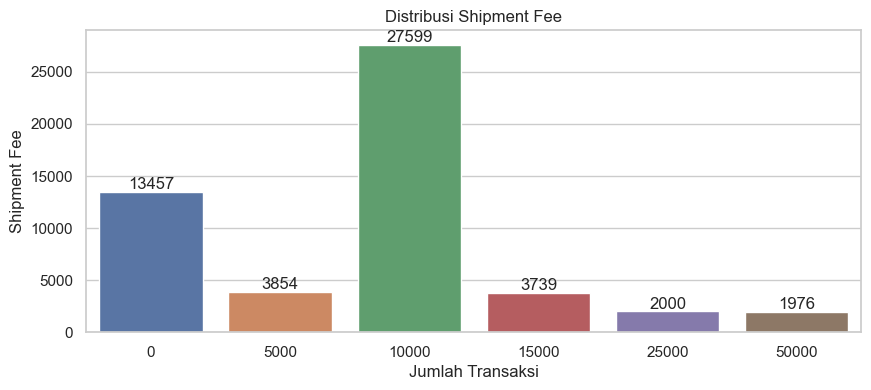

In [134]:
dist_shipment_fee = df.shipment_fee.value_counts()
#dist_shipment_fee
plt.figure(figsize=(10,4), dpi=100)
a = sns.barplot(x=dist_shipment_fee.index, y=dist_shipment_fee.values)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Distribusi Shipment Fee')
plt.ylabel('Shipment Fee')
plt.xlabel('Jumlah Transaksi')
plt.show()

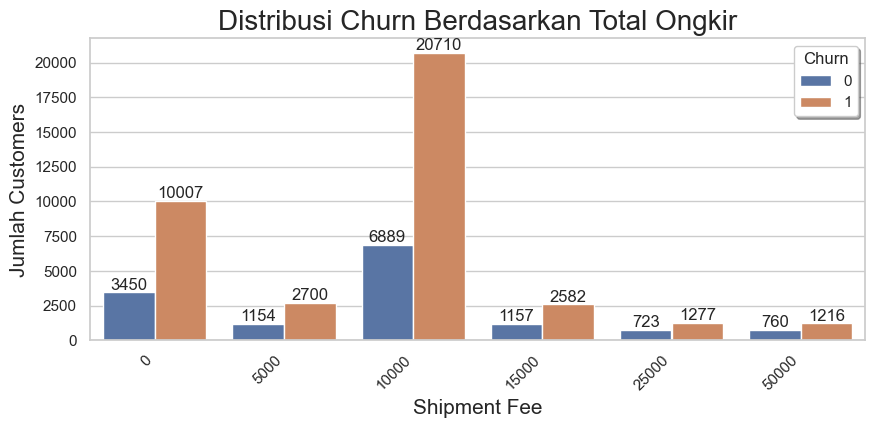

In [135]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(x='shipment_fee', hue='Churn', data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Shipment Fee", fontsize=15)
plt.ylabel("Jumlah Customers", fontsize=15)
plt.title("Distribusi Churn Berdasarkan Total Ongkir", fontsize=20)
plt.legend(title = "Churn", loc = "upper right", shadow=True)
plt.show()

In [136]:
segmen = df.groupby(["shipment_fee","Churn"])["customer_id"].count()

print(segmen)

shipment_fee  Churn
0             0         3450
              1        10007
5000          0         1154
              1         2700
10000         0         6889
              1        20710
15000         0         1157
              1         2582
25000         0          723
              1         1277
50000         0          760
              1         1216
Name: customer_id, dtype: int64


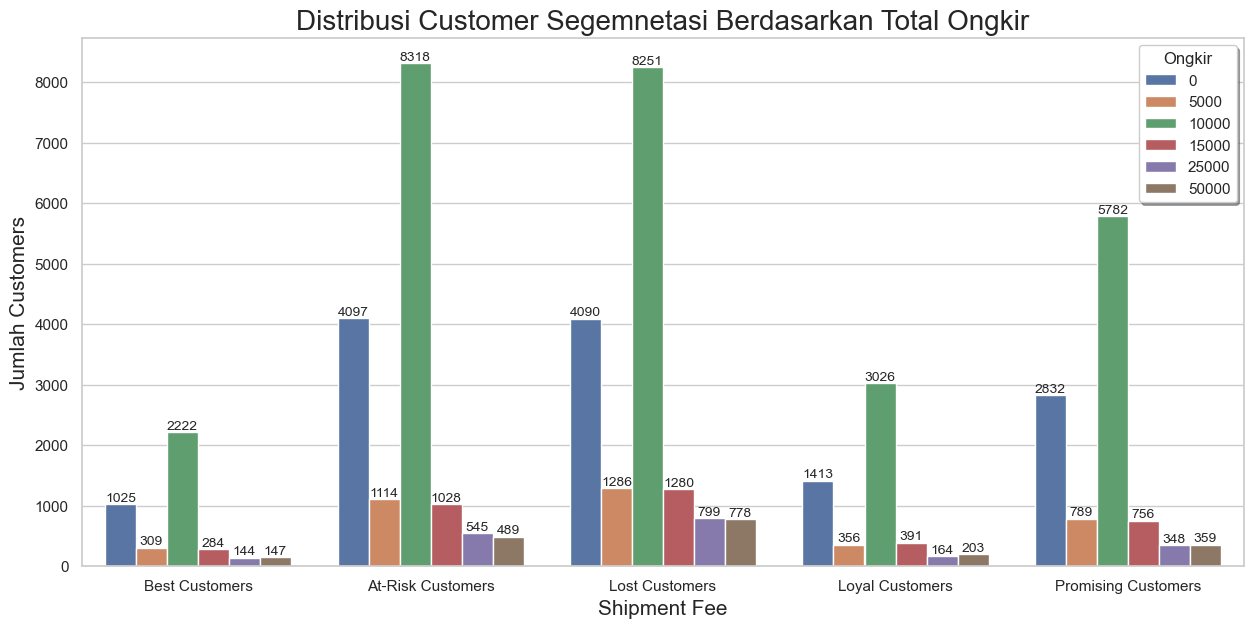

In [137]:
plt.figure(figsize=(15,7), dpi=100)
a = sns.countplot(x='Customer_segment', hue='shipment_fee', data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge', fontsize=10)
plt.xlabel("Shipment Fee", fontsize=15)
plt.ylabel("Jumlah Customers", fontsize=15)
plt.title("Distribusi Customer Segemnetasi Berdasarkan Total Ongkir", fontsize=20)
plt.legend(title = "Ongkir", loc = "upper right", shadow=True, bbox_to_anchor=(1, 1))
plt.show()

In [138]:
segmen = df.groupby(["Customer_segment","shipment_fee"])["customer_id"].count()

print(segmen)

Customer_segment     shipment_fee
At-Risk Customers    0               4097
                     5000            1114
                     10000           8318
                     15000           1028
                     25000            545
                     50000            489
Best Customers       0               1025
                     5000             309
                     10000           2222
                     15000            284
                     25000            144
                     50000            147
Lost Customers       0               4090
                     5000            1286
                     10000           8251
                     15000           1280
                     25000            799
                     50000            778
Loyal Customers      0               1413
                     5000             356
                     10000           3026
                     15000            391
                     25000            164


### Churn Berdasarkan Monetary

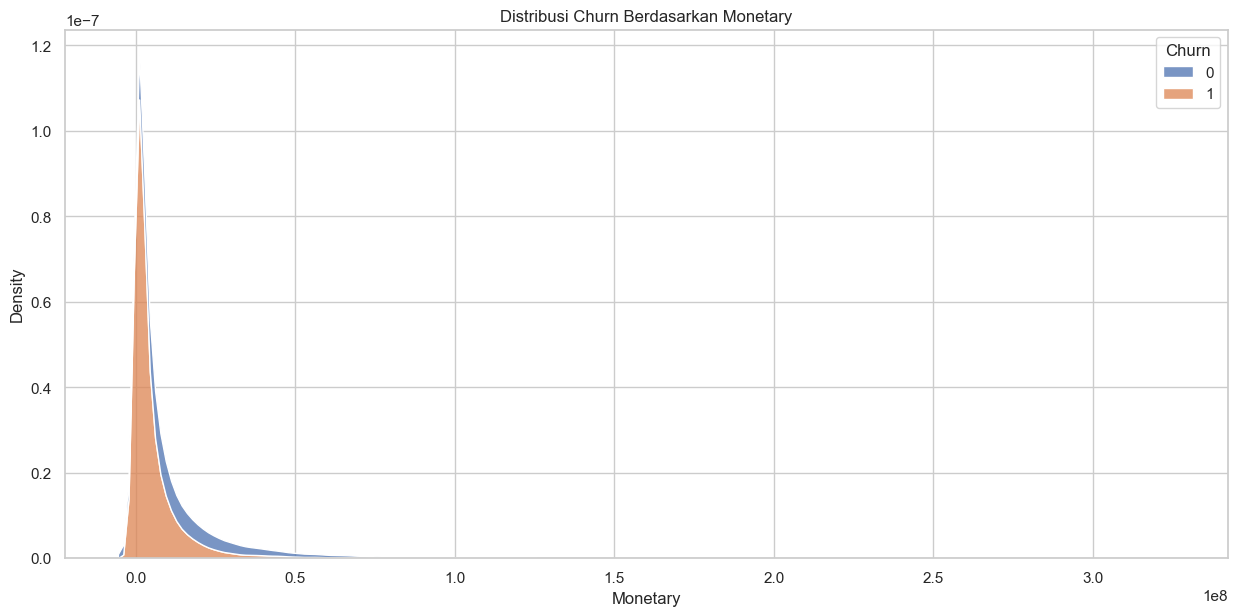

In [139]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='monetary', hue='Churn', multiple="stack")
plt.xlabel("Monetary")
plt.ylabel("Density")
plt.title("Distribusi Churn Berdasarkan Monetary")
plt.show()

In [140]:
px.histogram(df, x='monetary', title='Monetary vs. Churn', color='Churn')

### Churn Berdasarkan Frequency

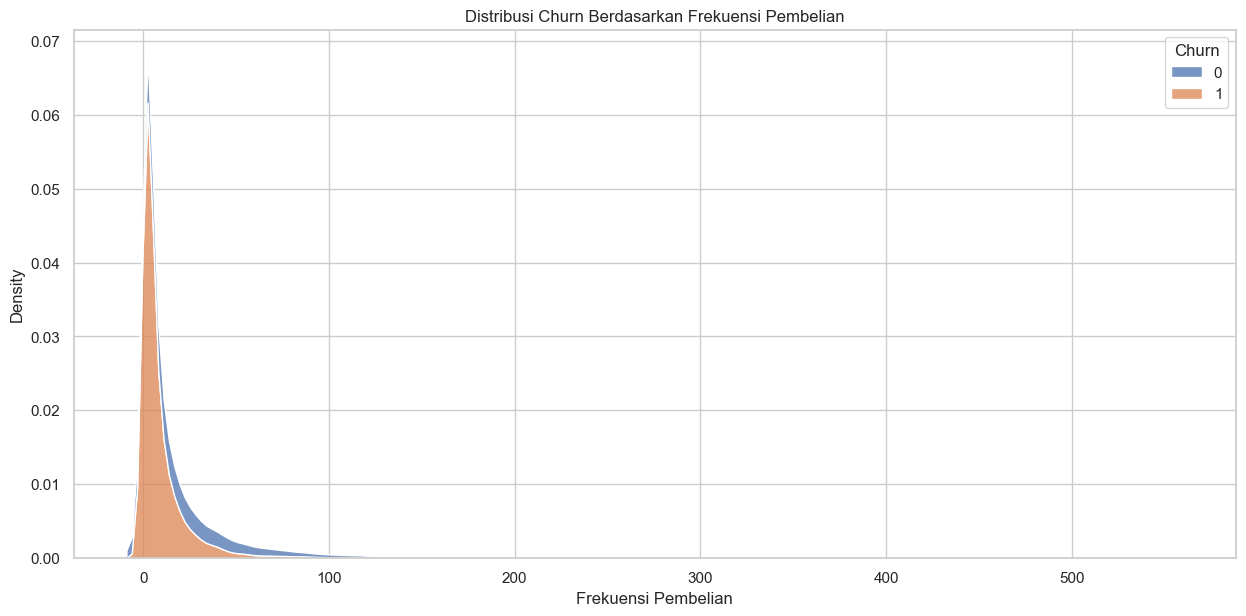

In [141]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='frequency', hue='Churn', multiple="stack")
plt.xlabel("Frekuensi Pembelian")
plt.ylabel("Density")
plt.title("Distribusi Churn Berdasarkan Frekuensi Pembelian")
plt.show()

In [142]:
px.histogram(df, x='frequency', title='Frequency vs. Churn', color='Churn')

### Churn Berdasarkan Recency

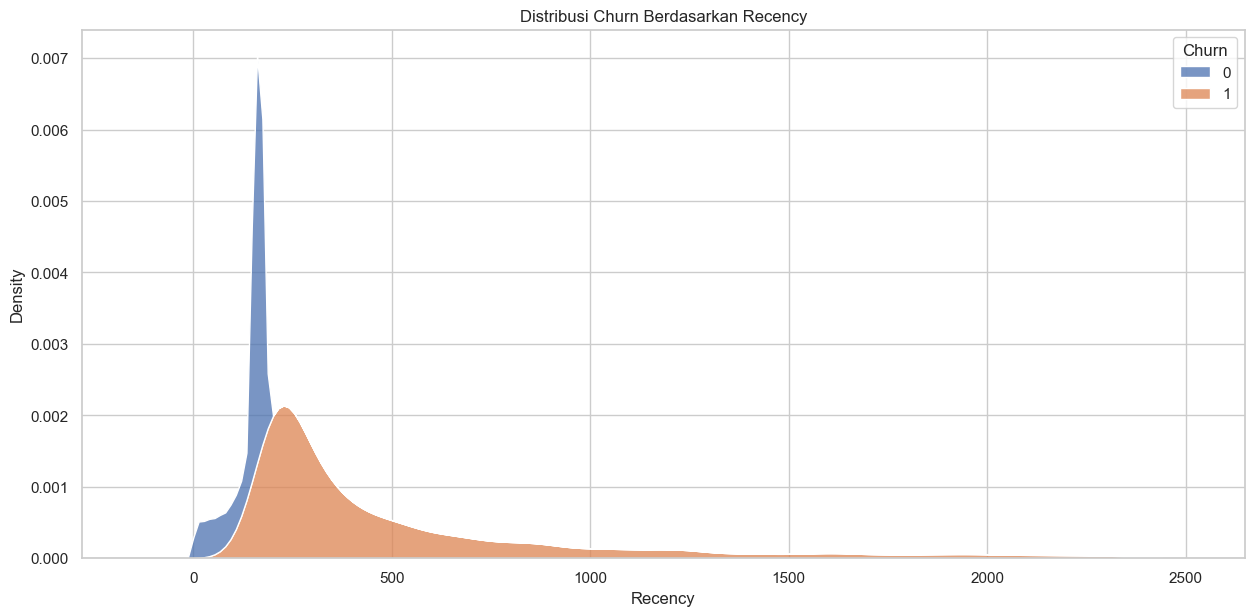

In [143]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='recent_days', hue='Churn', multiple="stack")
plt.xlabel("Recency")
plt.ylabel("Density")
plt.title("Distribusi Churn Berdasarkan Recency")
plt.show()

In [144]:
px.histogram(df, x='recent_days', title='Recency vs. Churn', color='Churn')

In [145]:
df['Churn'].value_counts()

1    38492
0    14133
Name: Churn, dtype: int64

In [146]:
df['Customer_segment'].value_counts()

Lost Customers         16484
At-Risk Customers      15591
Promising Customers    10866
Loyal Customers         5553
Best Customers          4131
Name: Customer_segment, dtype: int64

In [147]:
df['Customer_segment'] = df['Customer_segment'].replace({'Lost Customers' : 0, 'At-Risk Customers' : 1, 'Promising Customers' : 2, 'Loyal Customers' : 3, 'Best Customers' : 4})
df['Customer_segment'] = df['Customer_segment'].astype(int)
df['Customer_segment'] = df['Customer_segment'].astype(float)

## Outlier Detection

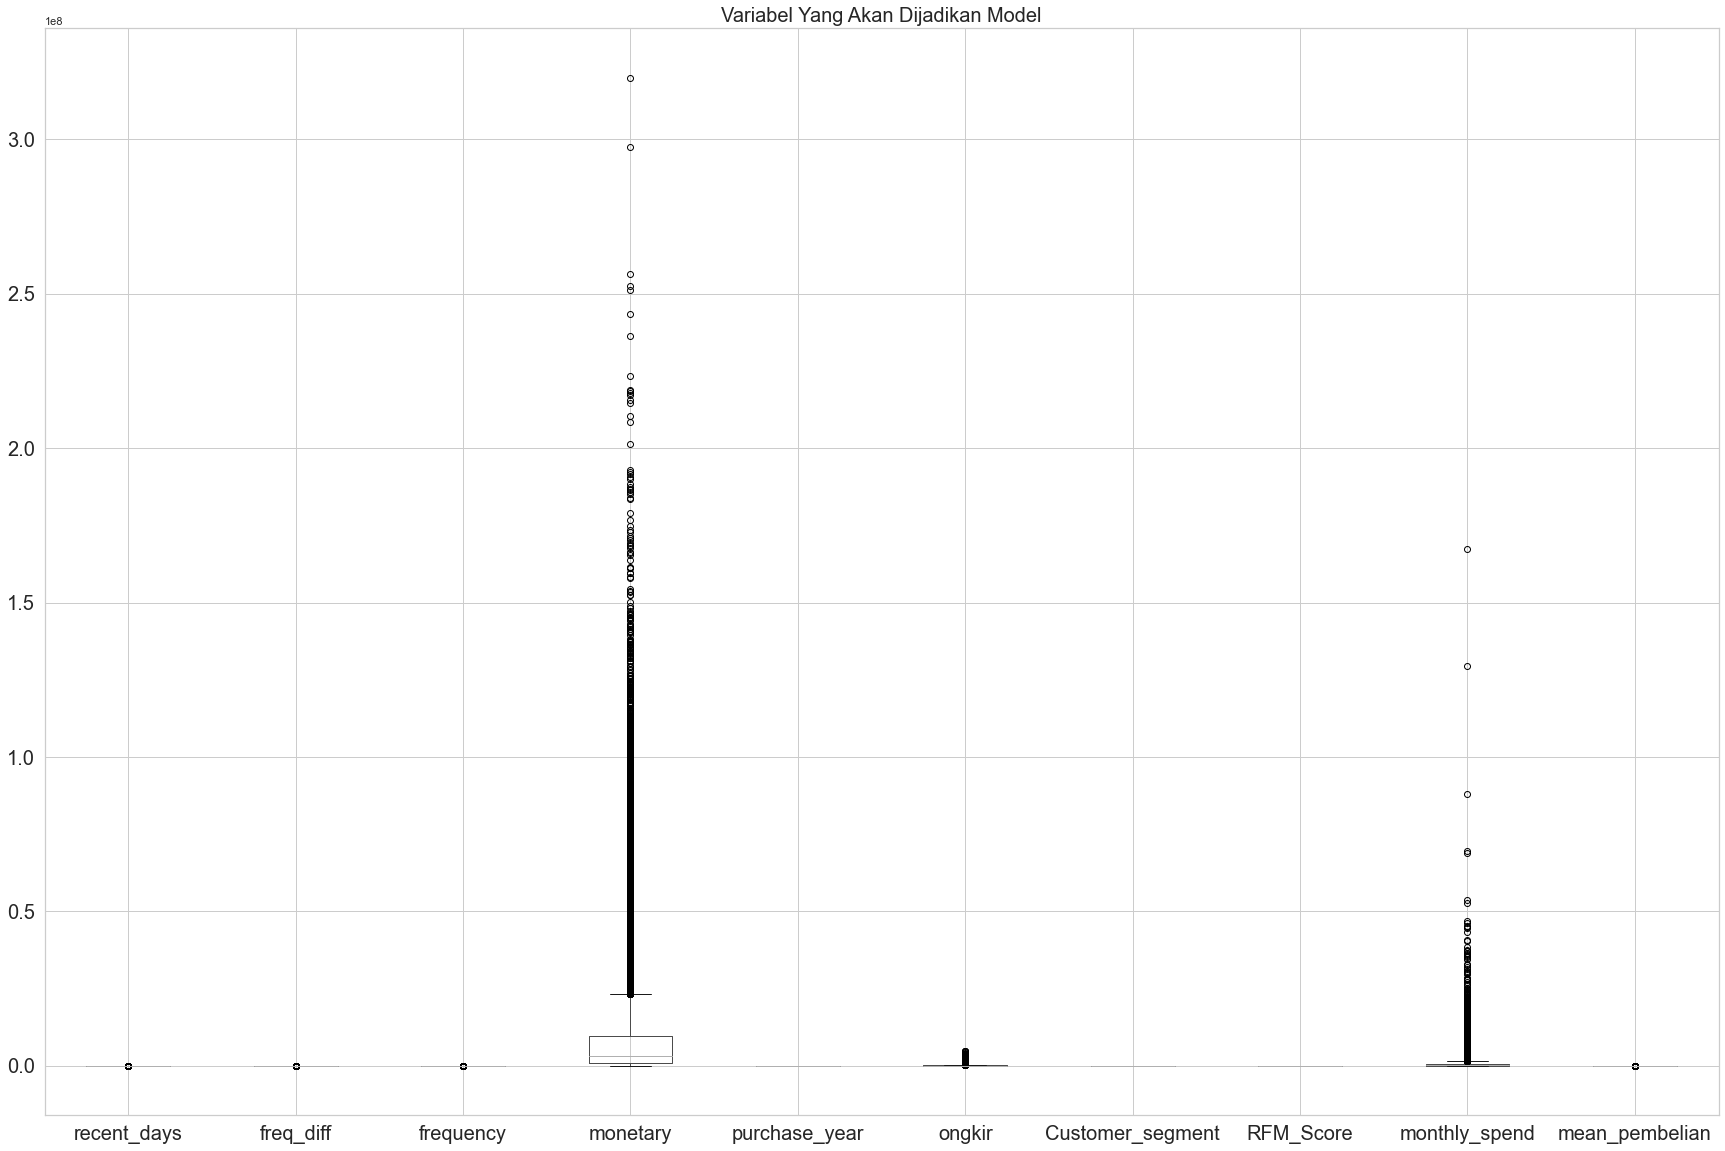

In [148]:
cols = ['recent_days', 'freq_diff',  'frequency', 'monetary', 'purchase_year', 'ongkir', 
        'Customer_segment', 'RFM_Score', 'monthly_spend', 'mean_pembelian']
df[cols].boxplot(figsize=(30,20), fontsize=20)
plt.title("Variabel Yang Akan Dijadikan Model", fontsize=20)
plt.show()

In [149]:
# Cek Outlier dengan IQR
def outlier_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    return batas_bawah, batas_atas

data_outlier = {}
for col in cols:
    batas_bawah, batas_atas = outlier_iqr(df[col])
    outliers = df[(df[col] < batas_bawah) | (df[col] > batas_atas)]
    data_outlier[col] = (outliers, len(outliers))
    print('Outlier (', col, ') :', len(outliers), 'outlier')

Outlier ( recent_days ) : 5687 outlier
Outlier ( freq_diff ) : 7373 outlier
Outlier ( frequency ) : 5916 outlier
Outlier ( monetary ) : 5548 outlier
Outlier ( purchase_year ) : 0 outlier
Outlier ( ongkir ) : 5728 outlier
Outlier ( Customer_segment ) : 0 outlier
Outlier ( RFM_Score ) : 0 outlier
Outlier ( monthly_spend ) : 5512 outlier
Outlier ( mean_pembelian ) : 4045 outlier


In [150]:
# Handling (Monetary)
q1 = df['monetary'].quantile(0.25)
q3 = df['monetary'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['monetary'] = np.where(df['monetary'] > batas_atas, batas_atas, df['monetary'])
df['monetary'] = np.where(df['monetary'] < batas_bawah, batas_bawah, df['monetary'])

batas_bawah :  -12627475.0
batas_atas :  23254949.0


In [151]:
# Handling (Monthly Spend)
q1 = df['monthly_spend'].quantile(0.25)
q3 = df['monthly_spend'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['monthly_spend'] = np.where(df['monthly_spend'] > batas_atas, batas_atas, df['monthly_spend'])
df['monthly_spend'] = np.where(df['monthly_spend'] < batas_bawah, batas_bawah, df['monthly_spend'])

batas_bawah :  -674795.175
batas_atas :  1442669.105


In [152]:
# Handling Ongkir
q1 = df['ongkir'].quantile(0.25)
q3 = df['ongkir'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['ongkir'] = np.where(df['ongkir'] > batas_atas, batas_atas, df['ongkir'])
df['ongkir'] = np.where(df['ongkir'] < batas_bawah, batas_bawah, df['ongkir'])

batas_bawah :  -202500.0
batas_atas :  377500.0


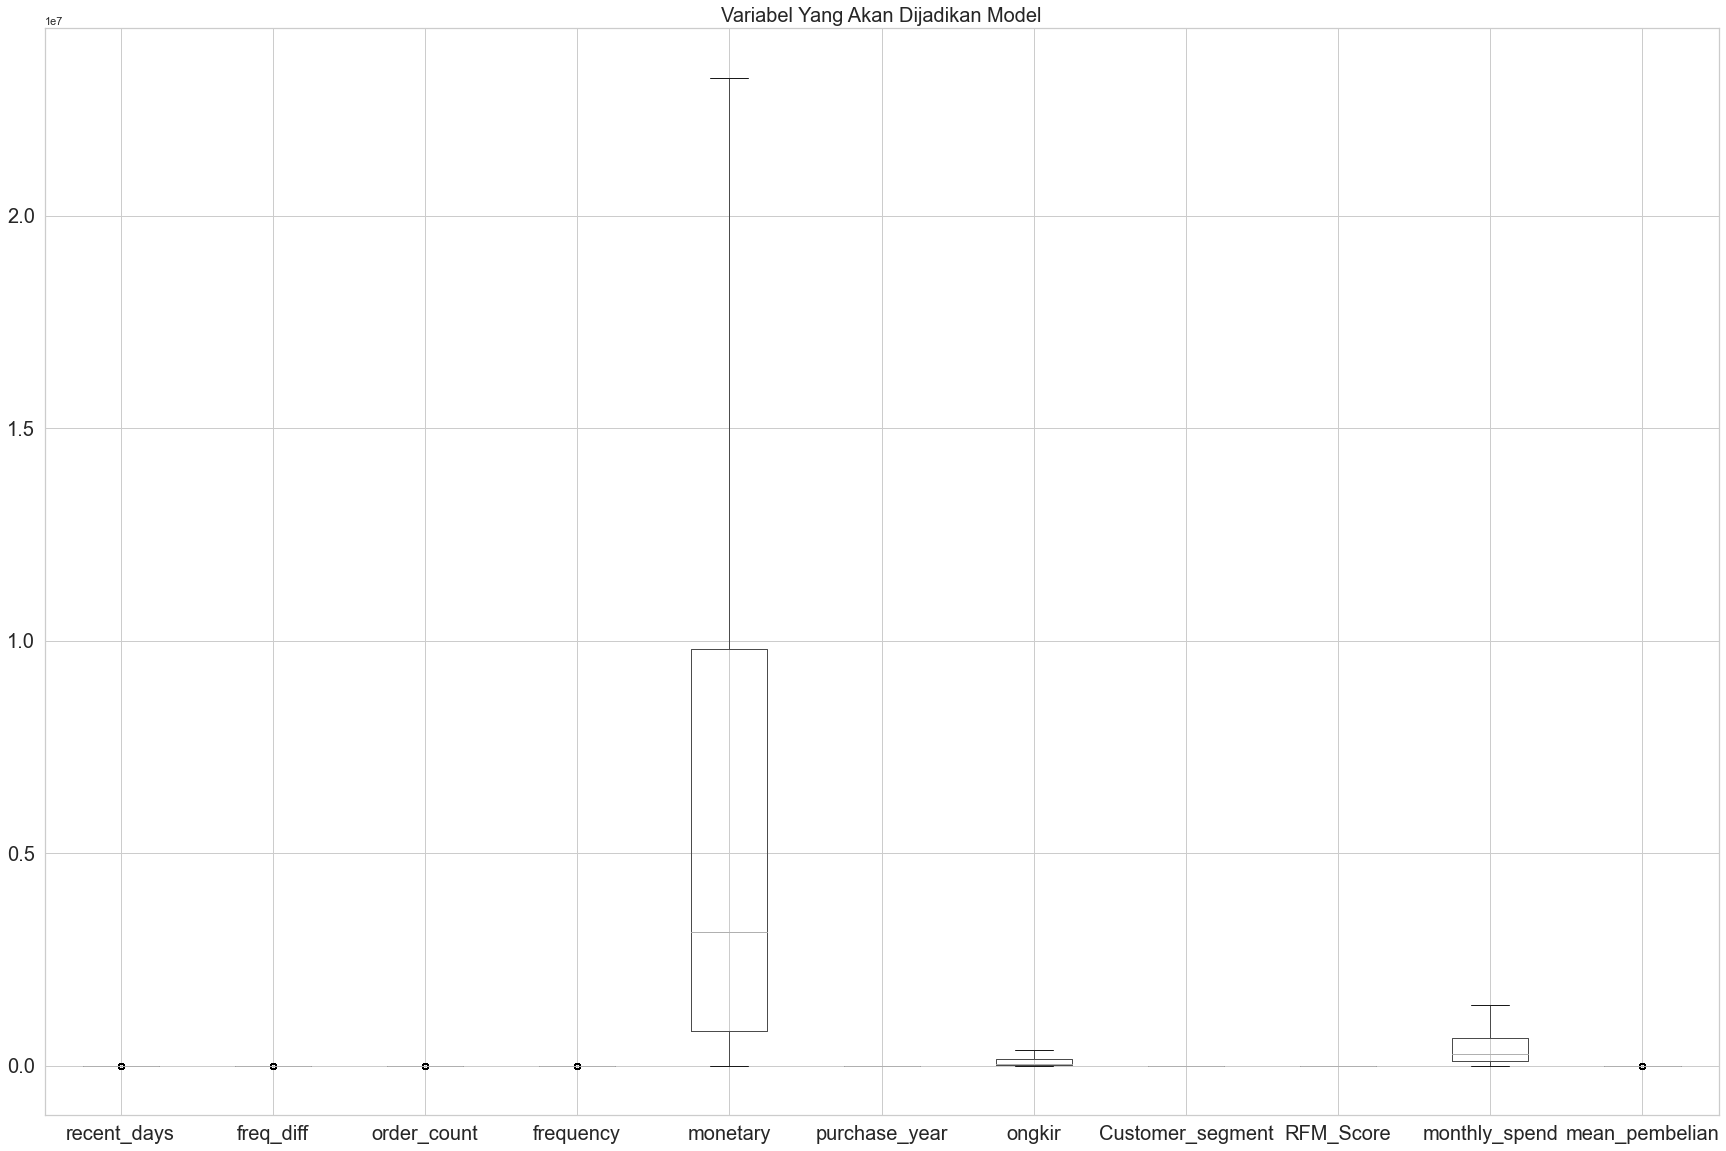

In [153]:
cols = ['recent_days', 'freq_diff', 'order_count', 'frequency', 'monetary', 
    'purchase_year', 'ongkir', 'Customer_segment', 'RFM_Score', 'monthly_spend','mean_pembelian']
df[cols].boxplot(figsize=(30,20), fontsize=20)
plt.title("Variabel Yang Akan Dijadikan Model", fontsize=20)
plt.show()

## Feature Selection

In [154]:
# Cek Korelasi
df_korelasi = df.corr(method='spearman')
df_korelasi = df_korelasi['Churn'].sort_values(ascending=False)
df_korelasi = pd.DataFrame(df_korelasi)
df_korelasi = df_korelasi.reset_index()
df_korelasi.columns = ['feature', 'Churn']
df_korelasi

feature     Churn
0                    Churn  1.000000
1              recent_days  0.767668
2                freq_diff  0.513053
3           mean_pembelian  0.313238
4          selisih_tanggal  0.044225
5                   tenure  0.044225
6             promo_amount  0.016281
7                     hari  0.015547
8        home_location_lat  0.012874
9                     year  0.003867
10      home_location_long -0.002080
11             customer_id -0.003274
12  shipment_location_long -0.025907
13   shipment_location_lat -0.034450
14            shipment_fee -0.039077
15                      id -0.039317
16                   price -0.046691
17            total_amount -0.067130
18                     qty -0.119525
19             total_promo -0.257022
20             order_count -0.322379
21             F_rank_norm -0.322816
22             M_rank_norm -0.322816
23               frequency -0.322816
24          type_buy_tahun -0.327205
25           purchase_year -0.327205
26                  ongkir -0.348671
27        Customer_segment -0.386327
28                monetary -0.395831
29               RFM_Score -0.403212
30           monthly_spend -0.567645
31             R_rank_norm -0.767668

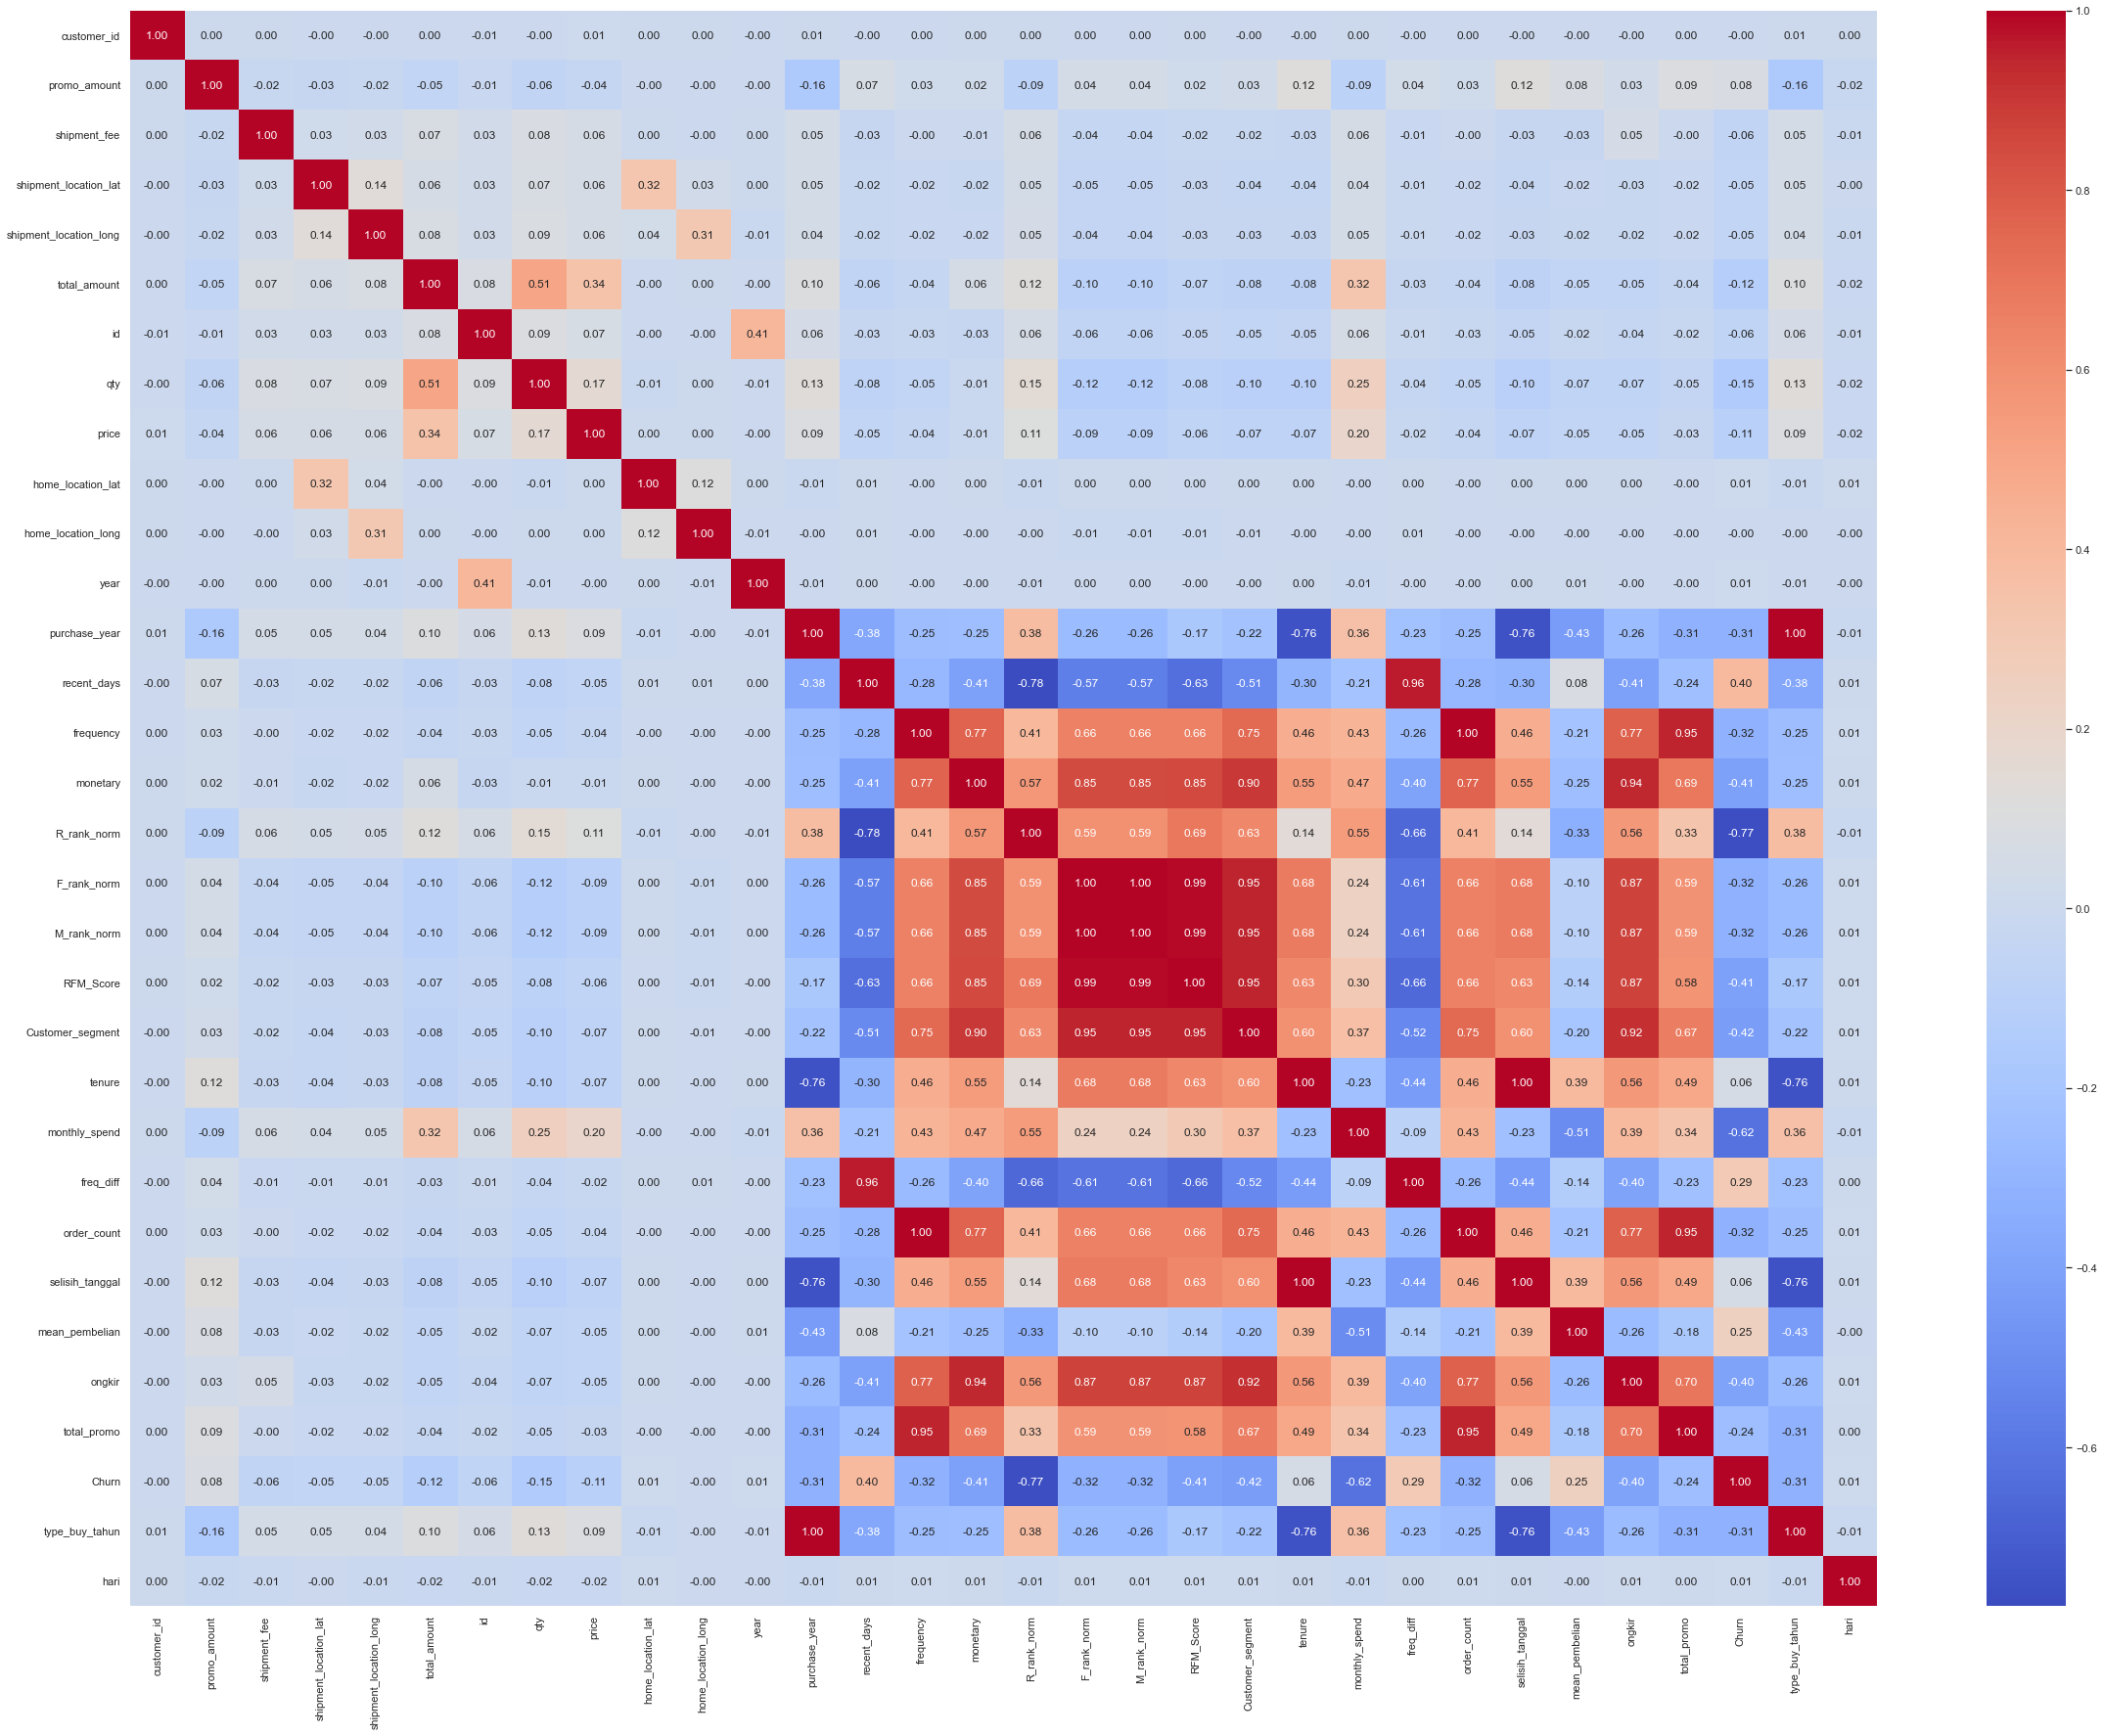

In [155]:
# Cek Korelasi
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## Ambil Data Untuk Manual

In [156]:
#df_naive_manual = (df[['recent_days', 'freq_diff', 'frequency', 'monetary', 
#    'purchase_year', 'ongkir', 'Customer_segment', 'RFM_Score', 'monthly_spend','mean_pembelian', 'Churn']])
# Ekspor
#df_naive_manual.to_csv('Data_Fix_Churn.csv', index=False)

#df_fix = pd.read_csv('Data_Fix_Churn.csv')
#a = df_fix.sample(frac=0.2, random_state=42)
# Masukan sample data ke csv
#a.to_csv('sample_data-2.csv', index=False)

In [157]:
#df_sample = pd.read_csv('sample_data-2.csv')
#df_sample.info()

In [158]:
X = (df[[
    'recent_days', 'freq_diff', 'frequency', 'monetary', 'purchase_year', 'ongkir', 
    'Customer_segment', 'RFM_Score', 'monthly_spend','mean_pembelian' ]])
y = df['Churn']

In [159]:
X

recent_days   freq_diff  frequency    monetary  purchase_year  \
0               97    1.865385         52  23122776.0           2018   
1              224   32.000000          7   3898561.0           2021   
2              212   35.333333          6   2638665.0           2021   
3              293  293.000000          1    197533.0           2022   
4              355   71.000000          5   2134870.0           2019   
...            ...         ...        ...         ...            ...   
52620           43   43.000000          1   3879648.0           2022   
52621          119  119.000000          1     26073.0           2022   
52622           46   46.000000          1    439242.0           2022   
52623          106  106.000000          1    139202.0           2022   
52624           75   75.000000          1   1047344.0           2022   

         ongkir  Customer_segment  RFM_Score  monthly_spend  mean_pembelian  
0      377500.0               4.0       4.63     467126.790       28.557692  
1       45000.0               1.0       2.77     256484.280       65.142857  
2       35000.0               1.0       2.65     236298.360       55.833333  
3       15000.0               0.0       0.78     197533.000        0.000000  
4       50000.0               1.0       2.29      77350.360      165.600000  
...         ...               ...        ...            ...             ...  
52620   10000.0               0.0       1.21    1442669.105        0.000000  
52621       0.0               0.0       1.18      26073.000        0.000000  
52622   50000.0               0.0       1.21     439242.000        0.000000  
52623    5000.0               0.0       1.18     139202.000        0.000000  
52624       0.0               0.0       1.19    1047344.000       86.354202  

[52625 rows x 10 columns]

In [160]:
y

0        0
1        1
2        1
3        1
4        1
        ..
52620    0
52621    0
52622    0
52623    0
52624    0
Name: Churn, Length: 52625, dtype: int64

In [161]:
X.isna().sum()

recent_days         0
freq_diff           0
frequency           0
monetary            0
purchase_year       0
ongkir              0
Customer_segment    0
RFM_Score           0
monthly_spend       0
mean_pembelian      0
dtype: int64

## Cek Imbalance Data

In [162]:
y.value_counts()

1    38492
0    14133
Name: Churn, dtype: int64

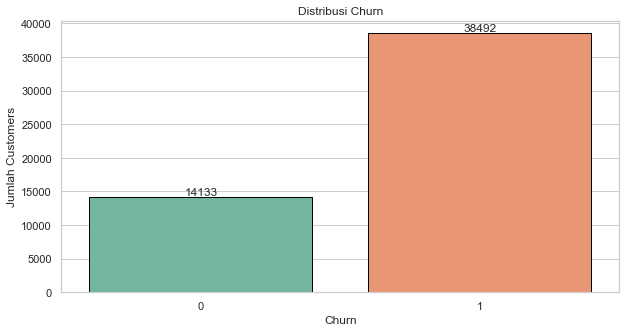

In [163]:
plt.figure(figsize=(10,5))
a = sns.countplot(y, palette="Set2", edgecolor="black")
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xlabel("Churn")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn")
plt.show()

In [164]:
X, y = SMOTE().fit_resample(X, y)
print(sorted(Counter(y).items()))

[(0, 38492), (1, 38492)]


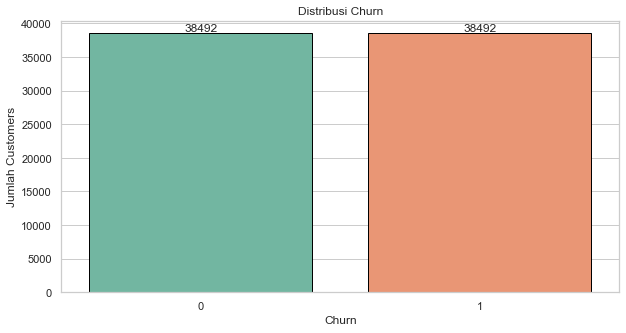

In [165]:
plt.figure(figsize=(10,5))
a = sns.countplot(y, palette="Set2", edgecolor="black")
for j in a.containers:
    a.bar_label(j, label_type='edge', fmt='%.0f')
plt.xlabel("Churn")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Churn")
plt.show()

## Feature Scaling

In [166]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [167]:
X

array([[4.09628378e-02, 7.87746881e-04, 9.28961749e-02, ...,
        9.22394678e-01, 3.22260541e-01, 1.27489698e-02],
       [9.45945946e-02, 1.35135135e-02, 1.09289617e-02, ...,
        5.09977827e-01, 1.75920666e-01, 2.90816327e-02],
       [8.95270270e-02, 1.49211712e-02, 9.10746812e-03, ...,
        4.83370288e-01, 1.61896882e-01, 2.49255952e-02],
       ...,
       [5.10979730e-02, 1.06624416e-02, 7.28597450e-03, ...,
        5.04756627e-01, 2.25674394e-01, 3.41885747e-02],
       [7.17905405e-02, 5.15485054e-03, 2.36794171e-02, ...,
        6.92935750e-01, 5.40092567e-01, 1.15514920e-02],
       [4.85641892e-02, 4.86417518e-02, 0.00000000e+00, ...,
        1.57766664e-01, 5.60237262e-02, 0.00000000e+00]])

## Spliting Data

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [169]:
# Jumlah data keseluruhan
print('Jumlah data Predictor (X)  :', X.shape)
print('Jumlah data Target (y)     :', y.shape)
print('==========================================')  
# Jumlah Data Train
print('Jumlah data Train (X)      :', X_train.shape)
print('Jumlah data Train (y)      :', y_train.shape)
print('===========================================')
# Jumlah Data Test
print('Jumlah data Test (X)       :', X_test.shape)
print('Jumlah data Test (y)       :', y_test.shape)
print('===========================================')
# Jumlah Data Validation
print('Jumlah data Validation (X) :', X_val.shape)
print('Jumlah data Validation (y) :', y_val.shape)

Jumlah data Predictor (X)  : (76984, 10)
Jumlah data Target (y)     : (76984,)
Jumlah data Train (X)      : (49269, 10)
Jumlah data Train (y)      : (49269,)
Jumlah data Test (X)       : (15397, 10)
Jumlah data Test (y)       : (15397,)
Jumlah data Validation (X) : (12318, 10)
Jumlah data Validation (y) : (12318,)


In [170]:
X_train

array([[0.05025338, 0.02181256, 0.00182149, ..., 0.30790957, 1.        ,
        0.00194092],
       [0.82601351, 0.82601351, 0.        , ..., 0.00443459, 0.26817449,
        0.        ],
       [0.13048986, 0.13048986, 0.        , ..., 0.06430155, 0.34701117,
        0.        ],
       ...,
       [0.02660473, 0.02690032, 0.        , ..., 0.16208426, 0.31932052,
        0.        ],
       [0.1410473 , 0.02820946, 0.00728597, ..., 0.40576497, 0.04947828,
        0.06714286],
       [0.10008446, 0.00556025, 0.03096539, ..., 0.6940133 , 0.07700642,
        0.04131944]])

# Modeling 

Feature yang digunakan untuk modeling adalah sebagai berikut:
1. recent_days = recency
2. freq_diff = freq_diff mengindikasikan berapa lama waktu yang dibutuhkan oleh sebuah customer dalam melakukan pembelian berulang. 
3. frequency = Frequency 
4. monetary = total belanja customer
5. purchase_year =  berisi tahun dilakukannya pembelian oleh pelanggan dan diisi berdasarkan informasi tanggal pembelian yang tersimpan dalam kolom created_at.
6. ongkir  = ongkos kirim saat transaksi
7. Customer_segment = Segmentasi customer dengan keterangan sebagai berikut: 'Lost Customers' = 0
, 'At-Risk Customers' = 1, 'Promising Customers' = 2, 'Loyal Customers' = 3, 'Best Customers' = 4
8. RFM_Score = skor RFM dari setiap customer pada dataset dengan skala 1-5
9. monthly_spend = total belanja customer setiap bulannya
10. mean_pembelian = rata-rata selisih antara pembelian yang dilakukan oleh pelanggan


Dan feature target yang digunakan adalah **Churn**
- 1 = Churn artinya customer tidak melakukan transaksi lagi
- 0 = Not Churn artinya customer masih melakukan transaksi

## Naive Bayes

### Training

In [171]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

### Validation

In [172]:
# Prediksi target dengan data validation
nb_val = model_nb.predict(X_val)
nb_val[:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [173]:
confusion_matrix(y_val, nb_val, normalize='true')

array([[0.89032676, 0.10967324],
       [0.26124511, 0.73875489]])

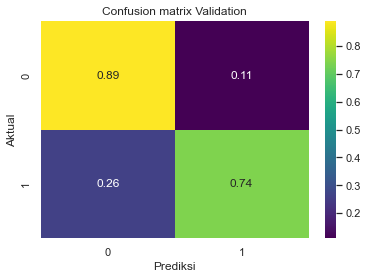

In [174]:
cm = confusion_matrix(y_val, nb_val, normalize='true')
sns.heatmap(cm, annot=True, cmap='viridis')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion matrix Validation')
plt.show()

In [175]:
val_acc = accuracy_score(y_val, nb_val)
print('Validation Accuracy :', val_acc)

Validation Accuracy : 0.8148238350381556


### Testing

In [176]:
# Prediksi target dengan data test
nb_test = model_nb.predict(X_test)
nb_test[:5]

array([0, 1, 0, 1, 0], dtype=int64)

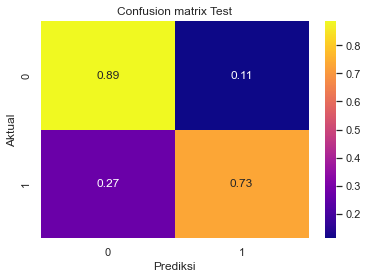

In [177]:
cm = confusion_matrix(y_test, nb_test, normalize='true')
sns.heatmap(cm, annot=True, cmap='plasma')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion matrix Test')
plt.show()

In [178]:
print(classification_report(y_test, nb_test))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82      7692
           1       0.87      0.73      0.79      7705

    accuracy                           0.81     15397
   macro avg       0.82      0.81      0.81     15397
weighted avg       0.82      0.81      0.81     15397



In [179]:
test_acc = accuracy_score(y_test, nb_test)
print('Test Accuracy :', test_acc)

Test Accuracy : 0.8091186594791193


# Evaluation

Confusion Matrix 


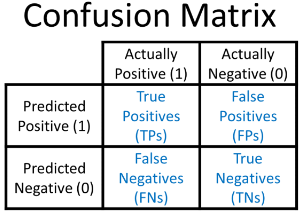

In [180]:
def nb_model(inputs, targets, name=''):
    pred_nb = model_nb.predict(inputs)
    accuracy_nb = accuracy_score(targets,pred_nb)
    print("Accuracy : {:.2f}%".format(accuracy_nb * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_nb) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_nb) * 100))
    

    cm = confusion_matrix(targets, pred_nb, normalize='true')
    plt.figure()
    sns.heatmap(cm, cmap='Set3', annot=True)
    plt.ylabel('Aktual', fontsize=14)
    plt.xlabel('Prediksi', fontsize=14)
    plt.title('{} Confusion Matrix'.format(name), fontsize=15);
    return pred_nb

Accuracy : 81.19%
Precison : 86.58%
Recall   : 73.85%


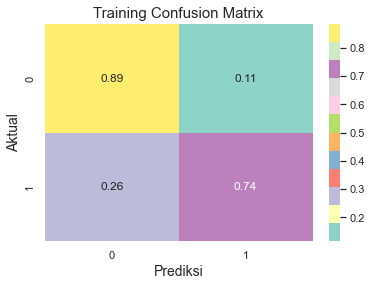

In [181]:
# Train Naive Bayes
train_nb = nb_model(X_train, y_train, 'Training')

Accuracy : 81.48%
Precison : 86.99%
Recall   : 73.88%


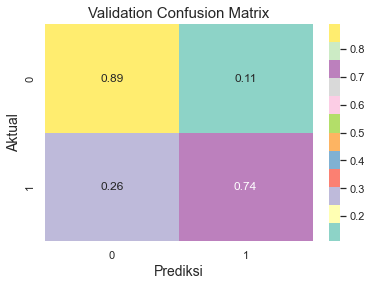

In [182]:
# Validation
val_nb = nb_model(X_val, y_val, 'Validation')

Accuracy : 80.91%
Precison : 86.59%
Recall   : 73.19%


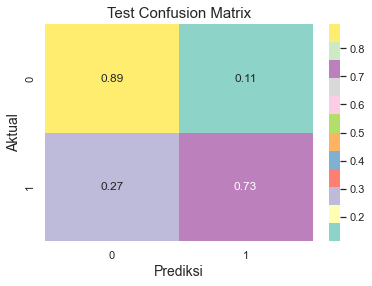

In [183]:
# Prediksi Naive Bayes
nb_pred = nb_model(X_test, y_test, 'Test')

In [184]:
print(classification_report(y_test, nb_test))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82      7692
           1       0.87      0.73      0.79      7705

    accuracy                           0.81     15397
   macro avg       0.82      0.81      0.81     15397
weighted avg       0.82      0.81      0.81     15397



In [185]:
# MAE
print('MAE Naive Bayes',mean_absolute_error(y_test, nb_test))

MAE Naive Bayes 0.19088134052088068


## Roc Auc

ROC AUC Model Naive Bayes :  0.8091839436069331


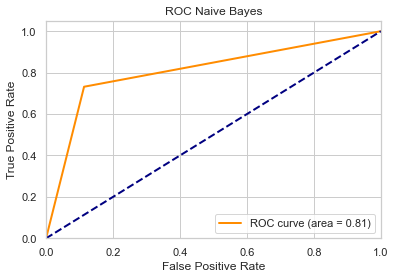

In [186]:
# Menghitung ROC AUC
roc_auc = roc_auc_score(y_test, nb_test)
print("ROC AUC Model Naive Bayes : ",roc_auc)

# Plot ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, nb_test)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Naive Bayes')
plt.legend(loc="lower right")
plt.show()

ROC AUC Model Naive Bayes :  0.8145408221370282


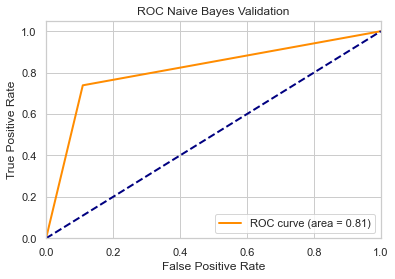

In [187]:
# Menghitung ROC AUC
roc_auc = roc_auc_score(y_val, nb_val)
print("ROC AUC Model Naive Bayes : ",roc_auc)

# Plot ROC AUC
fpr, tpr, thresholds = roc_curve(y_val, nb_val)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Naive Bayes Validation')
plt.legend(loc="lower right")
plt.show()

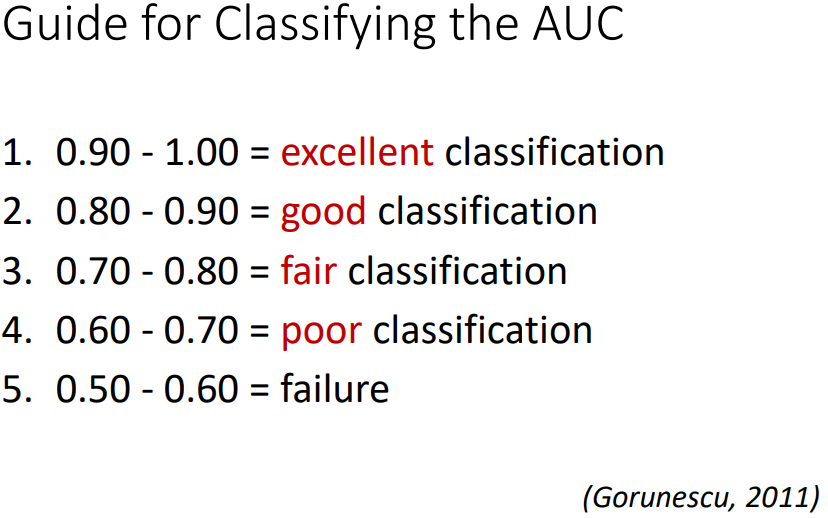

Semakin tinggi nilai ROC AUC, semakin baik kinerja model dalam membedakan kelas-kelas yang berbeda.

In general, an AUC of 0.5 suggests no
discrimination (i.e., ability to diagnose patients with and without
the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than
0.9 is considered outstanding

In [188]:
# Buat 10 Data Acak
#random_data = pd.read_csv('E:\Skripsi\Fauzan Kamil\Churn\Data Hitung Manual\Data_Fix_Churn.csv')
#random_data = random_data.sample(10)
#random_data

In [189]:
# Massukan data acak ke csv
#random_data.to_csv('Data Hitung Manual/data_10.csv', index=False)

# Deployment

### Save Model Naive Bayes

In [190]:
# Save Model
with open('model_nb.pkl', 'wb') as file:
    pk.dump(model_nb, file)

In [191]:
# Masukan Data Test dengan data yang sama pada saat test model
X_test

array([[0.09079392, 0.00477863, 0.03278689, ..., 0.71396896, 0.26879846,
        0.0262218 ],
       [0.43158784, 0.43158784, 0.        , ..., 0.01552106, 0.25714911,
        0.        ],
       [0.015625  , 0.01597158, 0.        , ..., 0.16366695, 1.        ,
        0.        ],
       ...,
       [0.06841216, 0.00502548, 0.02185792, ..., 0.69505084, 0.70939573,
        0.00740542],
       [0.07939189, 0.00721744, 0.01821494, ..., 0.62749446, 0.33725739,
        0.01542208],
       [0.36951014, 0.36951014, 0.        , ..., 0.01995565, 0.1781582 ,
        0.        ]])

In [192]:
y_test

46016    1
41376    1
53008    0
16528    1
20067    0
        ..
24924    1
59127    0
69719    0
16612    1
45093    1
Name: Churn, Length: 15397, dtype: int64

In [193]:
print('Jumlah data Test (X)       :', X_test.shape)
print('Jumlah data Test (y)       :', y_test.shape)

Jumlah data Test (X)       : (15397, 10)
Jumlah data Test (y)       : (15397,)


### Load Model Naive Bayes

In [194]:
# Load Model
with open('model_nb.pkl', 'rb') as file:
    model_pickle = pk.load(file)

In [195]:
# Prediksi
pred = model_pickle.predict(X_test)
pred[:5]

array([0, 1, 0, 1, 0], dtype=int64)

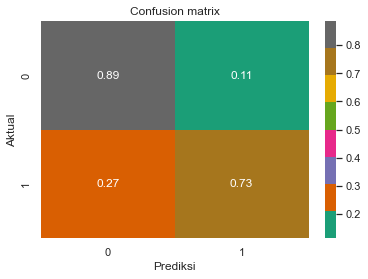

In [196]:
# Confusion Matrix
cm = confusion_matrix(y_test, pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Dark2')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion matrix')
plt.show()

### Classification Report

In [197]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82      7692
           1       0.87      0.73      0.79      7705

    accuracy                           0.81     15397
   macro avg       0.82      0.81      0.81     15397
weighted avg       0.82      0.81      0.81     15397



### Test Data Baru

In [198]:
# Input data baru
recency = int(input('Recency : '))
frequency = int(input('Frequency : '))
monetary = int(input('Monetary : '))
freq_diff = float(input('Freq_diff : '))
purhase_year = int(input('Purchase_year : '))
ongkir = int(input('Ongkir : '))
segmen = int(input('Segmen : '))
rfm_score = float(input('RFM_Score : '))
monthly_spend = int(input('Monthly_Spend : '))
mean_pembelian = int(input('Mean_Pembelian : '))

# Prediksi
pred = model_pickle.predict([[recency, frequency, monetary, freq_diff, purhase_year, ongkir, segmen, rfm_score, monthly_spend, mean_pembelian]])
if pred == 0:
    print('Tidak Churn')
else:
    print('Churn')

Churn


In [199]:
pred_data_baru = model_pickle.predict([[97,1,52,23122776,2018,377500,4,4.63,467126,28]])
if pred_data_baru == 0:
    print('Tidak Churn')
else:
    print('Churn')

Tidak Churn


In [200]:
data = pd.read_csv('Data Hitung Manual\data_10.csv')
X = data.drop(['Churn'], axis=1)
y = data['Churn']

In [201]:
X

recent_days    freq_diff  frequency    monetary  purchase_year    ongkir  \
0          199     4.522727         44  21577417.0           2018  370000.0   
1          249    22.636364         11   4341734.0           2019  110000.0   
2           62    62.000000          1   2025423.0           2022   15000.0   
3         2275  2275.000000          1    539902.0           2016   10000.0   
4          199     2.584416         77  23254949.0           2016  377500.0   
5          178     4.238095         42  22330413.0           2019  377500.0   
6          161    80.500000          2    581873.0           2022   25000.0   
7          143   143.000000          1    541236.0           2022   25000.0   
8         1120  1120.000000          1    212840.0           2019   15000.0   
9          163    14.818182         11   2820958.0           2022   65000.0   

   Customer_segment  RFM_Score  monthly_spend  mean_pembelian  
0               3.0       4.31     430114.620       34.204545  
1               2.0       3.14     121730.860       97.272727  
2               0.0       1.20    1442669.105        0.000000  
3               0.0       0.48     539902.000        0.000000  
4               4.0       4.55     629962.540       26.649351  
5               3.0       4.37     527490.070       30.238095  
6               1.0       1.80    1246870.710        7.000000  
7               0.0       1.17     541236.000        0.000000  
8               0.0       0.54     212840.000        0.000000  
9               2.0       3.40     467562.100       16.454545

In [202]:
y

0    1
1    1
2    0
3    1
4    1
5    0
6    0
7    0
8    1
9    0
Name: Churn, dtype: int64

In [203]:
pred_baru = model_pickle.predict(X)
pred_baru[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [204]:
print(classification_report(y, pred_baru))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       0.00      0.00      0.00         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10

